In [ ]:
# -*- coding: utf-8 -*-
"""
Setup Cell: Import Libraries and Configure Environment
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings

# Suppress minor warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configuration: file path and selected variables
FILE_PATH = 'world-data-2023.csv'  # Upload this file in Colab
SELECTED_VARS = [
    'Life expectancy',
    'Birth Rate',
    'Population',
    'Co2-Emissions',
    'Forested Area (%)'
]


In [ ]:
def clean_numeric_column(series):
    # Remove $, commas, spaces, % symbols
    cleaned = series.astype(str).str.replace(r'[$,\s%]', '', regex=True)
    # Convert empty strings to NaN
    cleaned = cleaned.replace('', np.nan)
    # Convert to float
    return cleaned.astype(float)


In [ ]:
print("--- 1. DATA LOADING AND CLEANING ---")

try:
    df = pd.read_csv(FILE_PATH)
    print(f"Original observations: {len(df)}")

    for col in SELECTED_VARS:
        if col in df.columns:
            df[col] = clean_numeric_column(df[col])

    # Drop rows with missing values in selected variables
    df_clean = df.dropna(subset=SELECTED_VARS)
    print(f"Cleaned observations (used for analysis): {len(df_clean)}\n")

except FileNotFoundError:
    print(f"ERROR: File not found at '{FILE_PATH}'. Upload the CSV to Colab first.")
    df_clean = pd.DataFrame()
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    df_clean = pd.DataFrame()
    exit()

if df_clean.empty:
    print("No data available for analysis.")
    exit()


--- 1. DATA LOADING AND CLEANING ---
Original observations: 195
Cleaned observations (used for analysis): 185



In [ ]:
print("--- 2. RAW DATA ANALYSIS (UNGROUPED) ---")
print("\n[A] DESCRIPTIVE STATISTICS (Central Tendency & Variation)")

# Descriptive statistics
raw_stats = df_clean[SELECTED_VARS].describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
raw_stats.columns = ['Count', 'Mean', 'Std Dev (σ)', 'Min', 'Median (Q2)', 'Max']
raw_stats['Range'] = raw_stats['Max'] - raw_stats['Min']
raw_stats['Variance (σ²)'] = raw_stats['Std Dev (σ)'] ** 2

# Measures of Shape
raw_stats['Skewness'] = df_clean[SELECTED_VARS].skew()
raw_stats['Kurtosis'] = df_clean[SELECTED_VARS].kurt()

# Mode
mode_series = df_clean[SELECTED_VARS].mode().iloc[0]
raw_stats['Mode'] = mode_series

print("\nRaw Data Summary Statistics:")
print(raw_stats.round(2).to_markdown())


--- 2. RAW DATA ANALYSIS (UNGROUPED) ---

[A] DESCRIPTIVE STATISTICS (Central Tendency & Variation)

Raw Data Summary Statistics:
|                   |   Count |             Mean |     Std Dev (σ) |     Min |     Median (Q2) |          Max |        Range |   Variance (σ²) |   Skewness |   Kurtosis |    Mode |
|:------------------|--------:|-----------------:|----------------:|--------:|----------------:|-------------:|-------------:|----------------:|-----------:|-----------:|--------:|
| Life expectancy   |     185 |     72.29        |      7.38       |    52.8 |    73.2         | 84.2         | 31.4         |    54.51        |      -0.55 |      -0.36 |    76.5 |
| Birth Rate        |     185 |     20.36        |      9.84       |     6.4 |    18.07        | 46.08        | 39.68        |    96.85        |       0.59 |      -0.8  |    10   |
| Population        |     185 |      4.12204e+07 |      1.4835e+08 | 18233   |     9.46686e+06 |  1.39772e+09 |  1.3977e+09  |     2.20076e+16 |  

--- 2.2 Graphical Representation (Raw/Ungrouped Data) ---

Variable: Life expectancy



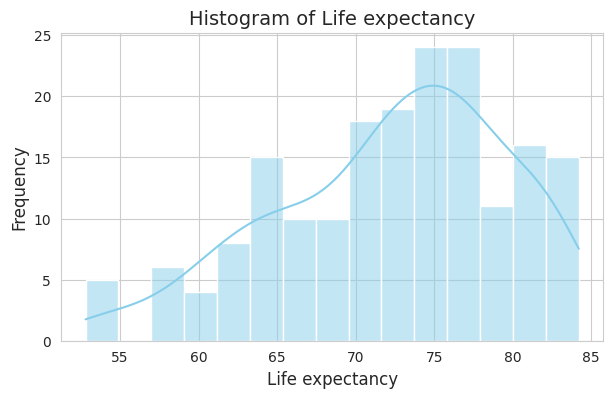

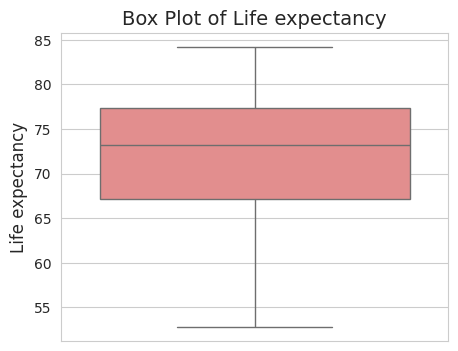

- Distribution: negatively skewed.
- Central tendency: Mean = 72.29, Median = 73.20.
- Variability: Standard Deviation = 7.38, Range = 52.80 to 84.20.
- Outliers: present (check box plot).

--------------------------------------------------------------------------------
Variable: Birth Rate



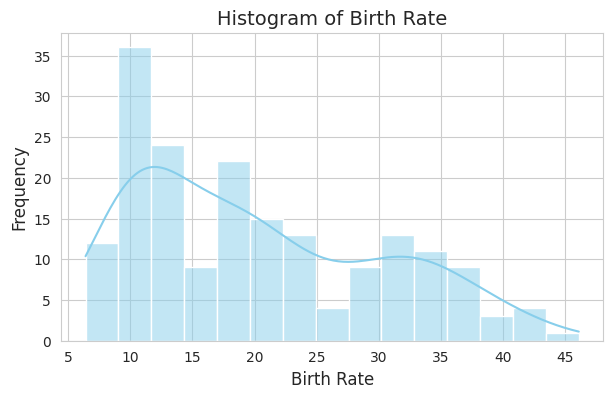

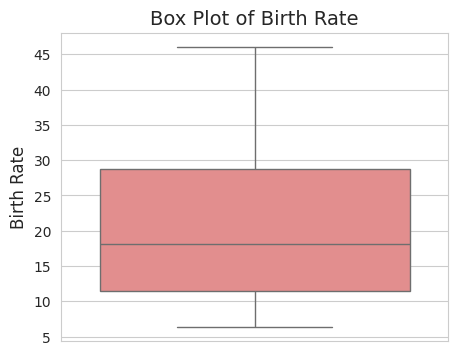

- Distribution: positively skewed.
- Central tendency: Mean = 20.36, Median = 18.07.
- Variability: Standard Deviation = 9.84, Range = 6.40 to 46.08.
- Outliers: present (check box plot).

--------------------------------------------------------------------------------
Variable: Population



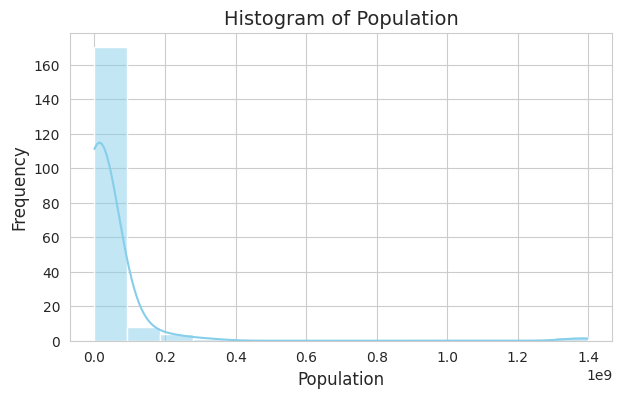

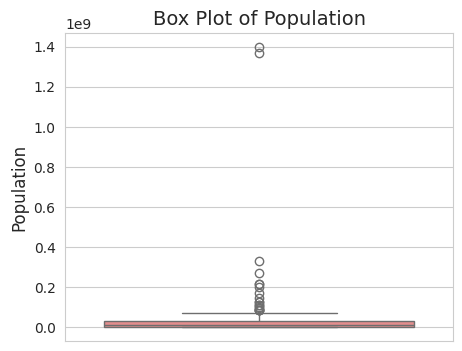

- Distribution: positively skewed.
- Central tendency: Mean = 41220439.04, Median = 9466856.00.
- Variability: Standard Deviation = 148349667.02, Range = 18233.00 to 1397715000.00.
- Outliers: present (check box plot).

--------------------------------------------------------------------------------
Variable: Co2-Emissions



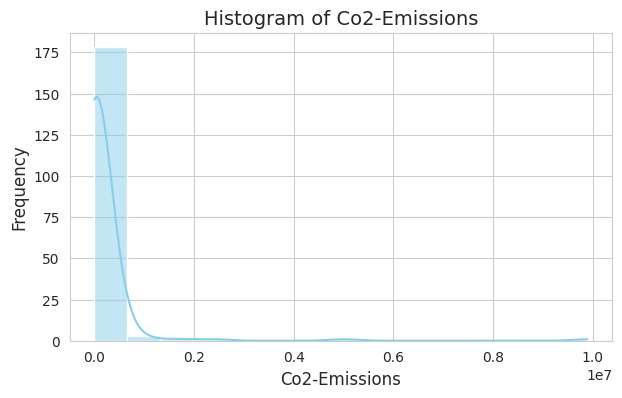

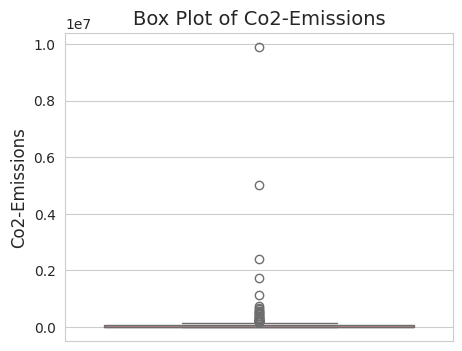

- Distribution: positively skewed.
- Central tendency: Mean = 180670.54, Median = 12963.00.
- Variability: Standard Deviation = 845293.37, Range = 51.00 to 9893038.00.
- Outliers: present (check box plot).

--------------------------------------------------------------------------------
Variable: Forested Area (%)



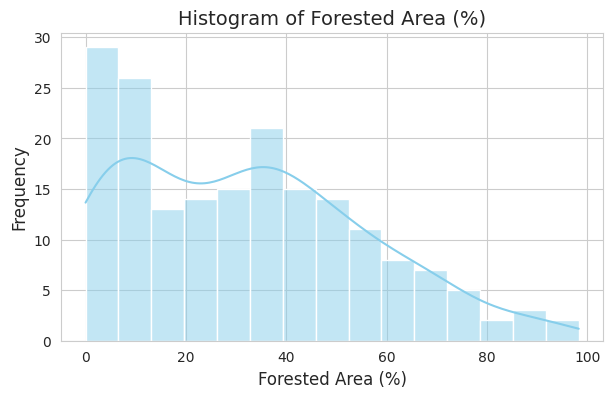

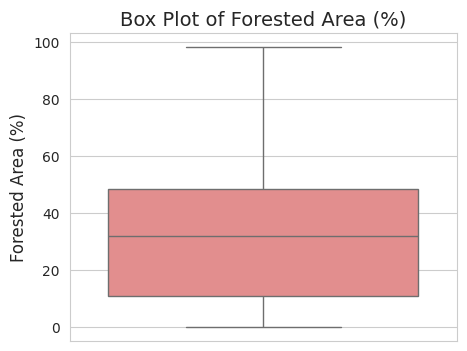

- Distribution: positively skewed.
- Central tendency: Mean = 32.17, Median = 31.80.
- Variability: Standard Deviation = 23.87, Range = 0.00 to 98.30.
- Outliers: present (check box plot).

--------------------------------------------------------------------------------


In [ ]:
print("--- 2.2 Graphical Representation (Raw/Ungrouped Data) ---\n")

for col in SELECTED_VARS:
    print(f"Variable: {col}\n")

    # Histogram
    plt.figure(figsize=(7, 4))
    sns.histplot(df_clean[col], kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df_clean[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

    # Description based on basic statistics
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    std_val = df_clean[col].std()
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    skew_val = df_clean[col].skew()

    # Generate textual description
    description = f"- Distribution: {'smooth and roughly symmetric' if abs(skew_val)<0.5 else 'positively skewed' if skew_val>0 else 'negatively skewed'}.\n"
    description += f"- Central tendency: Mean = {mean_val:.2f}, Median = {median_val:.2f}.\n"
    description += f"- Variability: Standard Deviation = {std_val:.2f}, Range = {min_val:.2f} to {max_val:.2f}.\n"
    description += f"- Outliers: {'present (check box plot)' if (df_clean[col].min() < mean_val - 2*std_val or df_clean[col].max() > mean_val + 2*std_val) else 'none notable'}.\n"

    print(description)
    print("-"*80)


In [ ]:
import pandas as pd
import numpy as np

# Initialize empty list to store results
summary_list = []

for col in SELECTED_VARS:
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    std_val = df_clean[col].std()
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    range_val = max_val - min_val
    skew_val = df_clean[col].skew()

    # Flag outliers (basic check: values beyond mean ± 2*std)
    outlier_flag = 'Yes' if (df_clean[col].min() < mean_val - 2*std_val or df_clean[col].max() > mean_val + 2*std_val) else 'No'

    # Append to summary list
    summary_list.append({
        'Variable': col,
        'Count': len(df_clean[col]),
        'Mean': round(mean_val, 2),
        'Median': round(median_val, 2),
        'Std Dev': round(std_val, 2),
        'Min': round(min_val, 2),
        'Max': round(max_val, 2),
        'Range': round(range_val, 2),
        'Skewness': round(skew_val, 2),
        'Outliers Present': outlier_flag
    })

# Convert to DataFrame
desc_stats_table = pd.DataFrame(summary_list)

# Display table in Colab
desc_stats_table


,Variable,Count,Mean,Median,Std Dev,Min,Max,Range,Skewness,Outliers Present
0,Life expectancy,185,72.29,73.20,7.380000e+00,52.8,8.420000e+01,3.140000e+01,-0.55,Yes
1,Birth Rate,185,20.36,18.07,9.840000e+00,6.4,4.608000e+01,3.968000e+01,0.59,Yes
2,Population,185,41220439.04,9466856.00,1.483497e+08,18233.0,1.397715e+09,1.397697e+09,8.20,Yes
3,Co2-Emissions,185,180670.54,12963.00,8.452934e+05,51.0,9.893038e+06,9.892987e+06,9.50,Yes
4,Forested Area (%),185,32.17,31.80,2.387000e+01,0.0,9.830000e+01,9.830000e+01,0.52,Yes



[B] CORRELATION ANALYSIS (Heatmap)


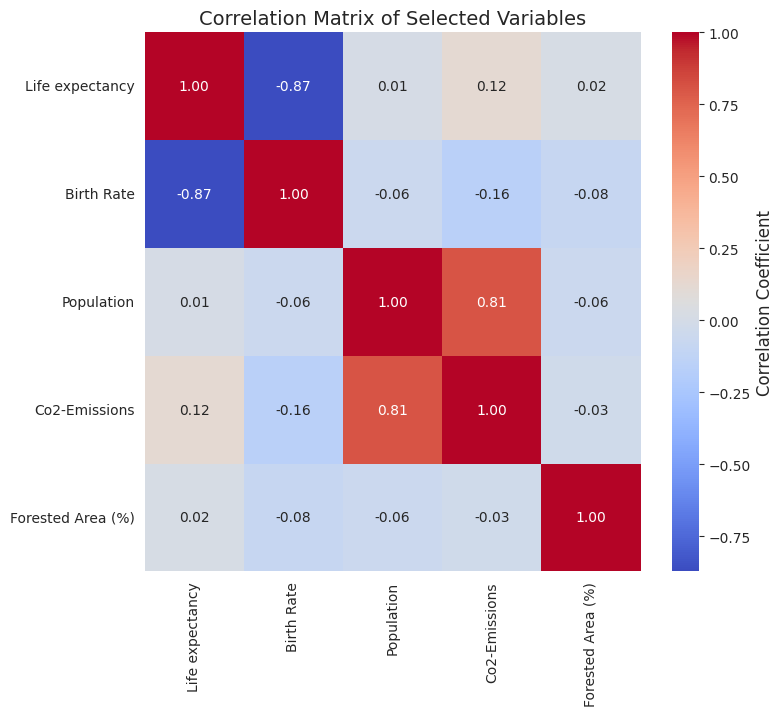

In [ ]:
print("\n[B] CORRELATION ANALYSIS (Heatmap)")

# Compute correlation matrix
correlation_matrix = df_clean[SELECTED_VARS].corr()

# Plot heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Selected Variables')
plt.show()



[C] GRAPHICAL REPRESENTATION


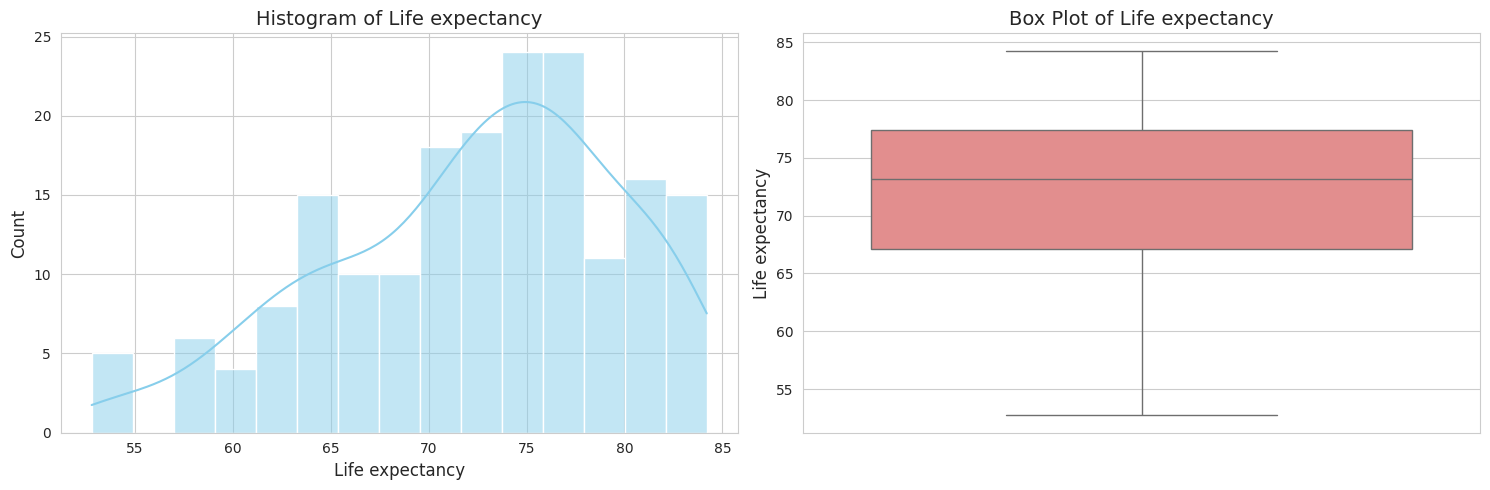

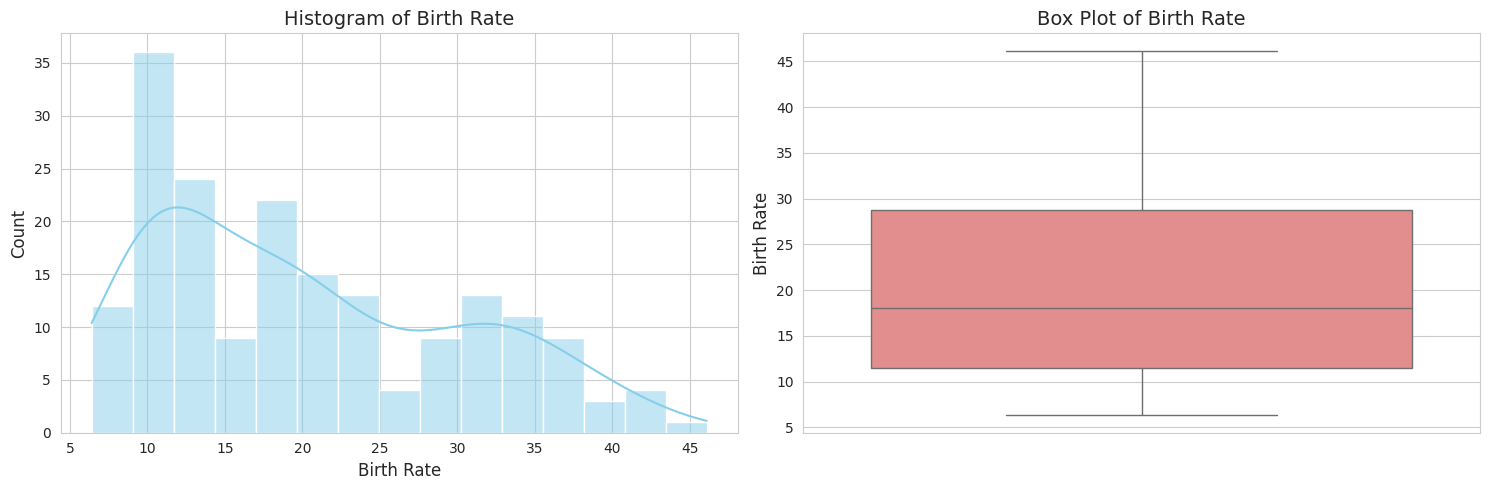

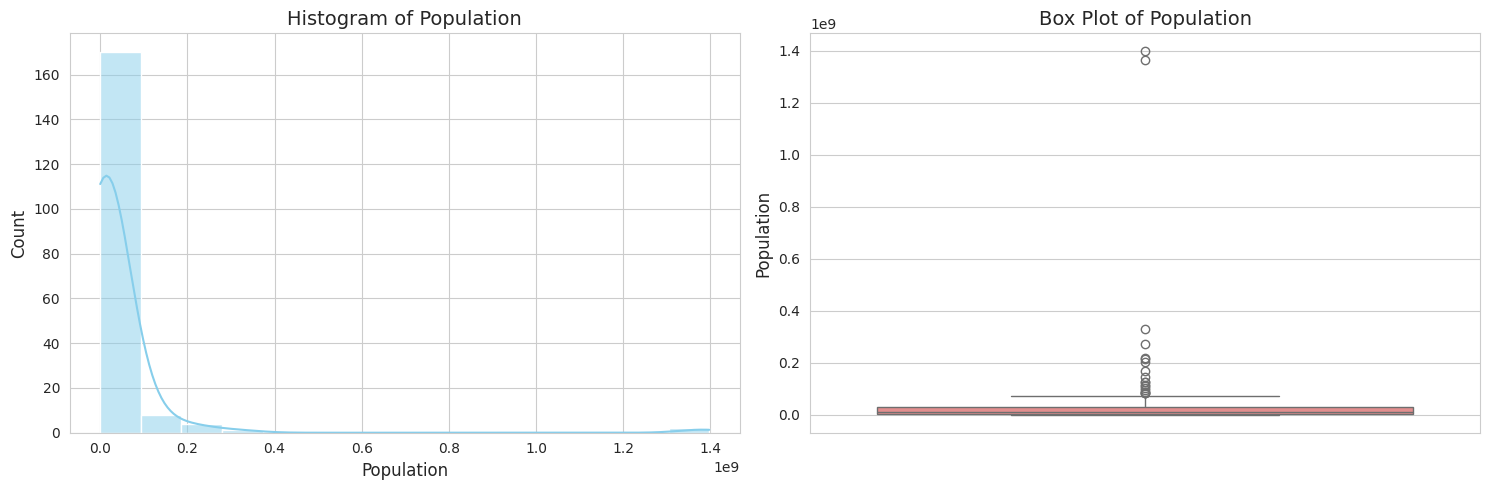

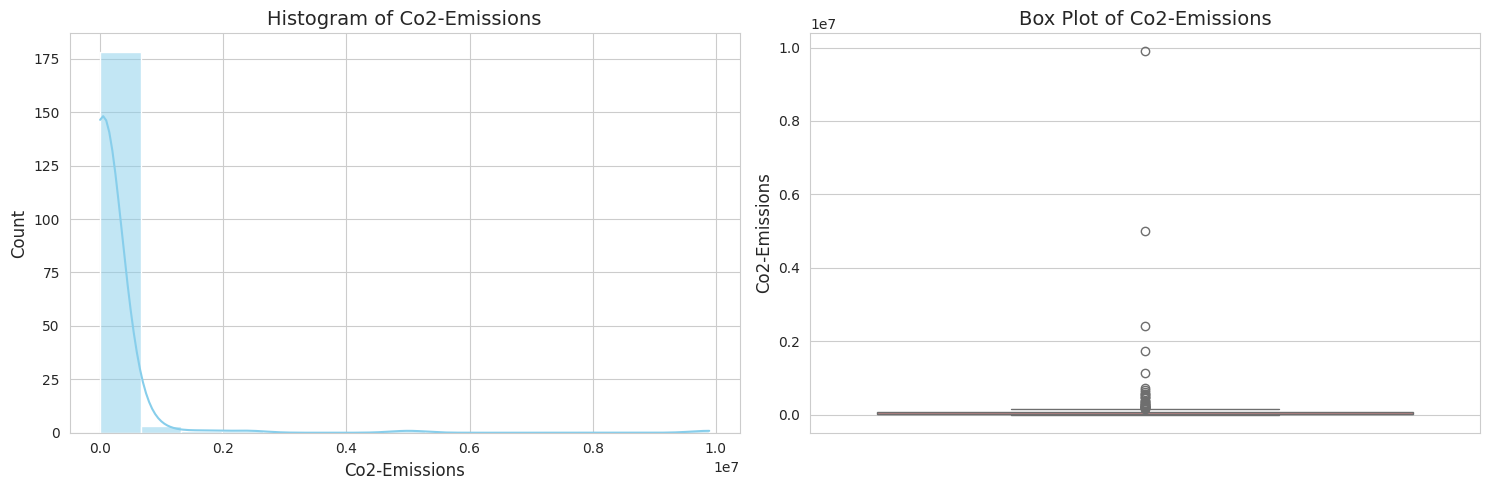

In [ ]:
print("\n[C] GRAPHICAL REPRESENTATION")

# Histograms and Boxplots for first 4 variables
for col in SELECTED_VARS[:4]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    sns.histplot(df_clean[col], kde=True, ax=axes[0], color='skyblue', bins=15)
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(y=df_clean[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()



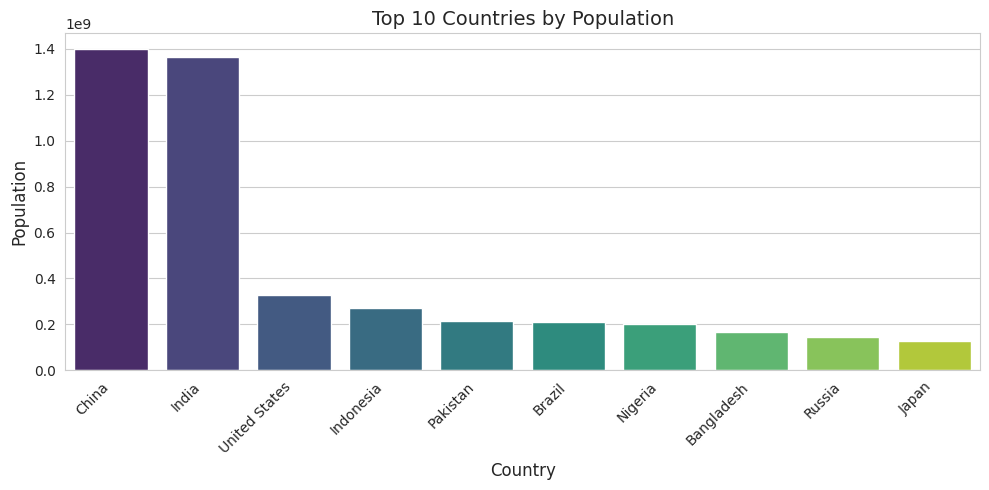

In [ ]:
# Bar Chart: Top 10 countries by Population (if 'Country' exists)
if 'Country' in df_clean.columns:
    top_pop = df_clean.sort_values('Population', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Country', y='Population', data=top_pop, palette='viridis')
    plt.title('Top 10 Countries by Population')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




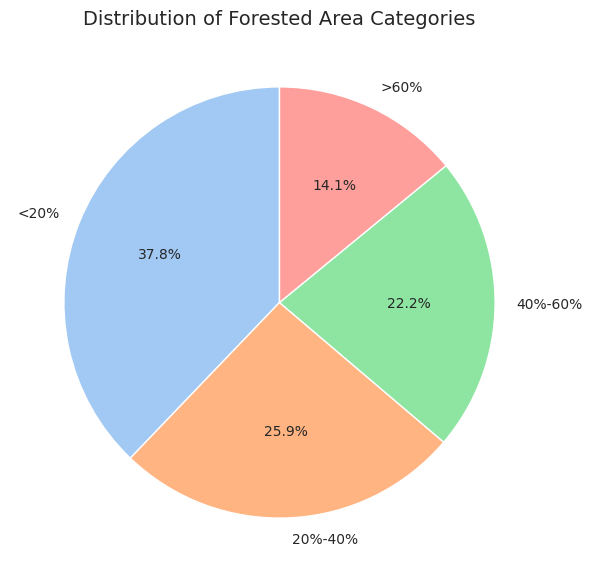

In [ ]:
# Pie Chart: Forested Area Categories
bins_forest = pd.cut(df_clean['Forested Area (%)'], bins=[0, 20, 40, 60, 100],
                     labels=['<20%', '20%-40%', '40%-60%', '>60%'], right=False)
pie_data = bins_forest.value_counts()
plt.figure(figsize=(7, 7))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Forested Area Categories')
plt.show()

In [ ]:
print("\n--- 3. GROUPED DATA ANALYSIS ---")
GROUP_VAR = 'Life expectancy'
NUM_BINS = 8

# Calculate bins
min_val = df_clean[GROUP_VAR].min()
max_val = df_clean[GROUP_VAR].max()
range_val = max_val - min_val
class_width = round(range_val / NUM_BINS, 2)

bins = np.linspace(min_val, max_val, NUM_BINS + 1)
bins[-1] += 0.001  # Include maximum
bin_labels = [f'{bins[i]:.1f} - {bins[i+1]:.1f}' for i in range(NUM_BINS)]

df_clean['Grouped_LE'] = pd.cut(df_clean[GROUP_VAR], bins=bins, labels=bin_labels, include_lowest=True, right=False)

# Frequency table
frequency_table = df_clean['Grouped_LE'].value_counts(dropna=False).sort_index().reset_index()
frequency_table.columns = ['Class Interval', 'Frequency (f)']
frequency_table = frequency_table[frequency_table['Class Interval'].notna()]

midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(NUM_BINS)]
frequency_table['Midpoint (m)'] = midpoints
frequency_table['Relative Frequency (rf)'] = frequency_table['Frequency (f)'] / frequency_table['Frequency (f)'].sum()
frequency_table['Cumulative Frequency (cf)'] = frequency_table['Frequency (f)'].cumsum()

print(frequency_table.to_markdown(index=False))

# Grouped mean
grouped_mean = (frequency_table['Frequency (f)'] * frequency_table['Midpoint (m)']).sum() / frequency_table['Frequency (f)'].sum()
print(f"\nGrouped Data Mean: {grouped_mean:.2f}")
print(f"Raw Data Mean: {raw_stats.loc[GROUP_VAR, 'Mean']:.2f}")
print(f"Difference (Raw - Grouped): {raw_stats.loc[GROUP_VAR, 'Mean'] - grouped_mean:.2f}")



--- 3. GROUPED DATA ANALYSIS ---
| Class Interval   |   Frequency (f) |   Midpoint (m) |   Relative Frequency (rf) |   Cumulative Frequency (cf) |
|:-----------------|----------------:|---------------:|--------------------------:|----------------------------:|
| 52.8 - 56.7      |               5 |        54.7625 |                 0.027027  |                           5 |
| 56.7 - 60.6      |               8 |        58.6875 |                 0.0432432 |                          13 |
| 60.6 - 64.6      |              21 |        62.6125 |                 0.113514  |                          34 |
| 64.6 - 68.5      |              19 |        66.5375 |                 0.102703  |                          53 |
| 68.5 - 72.4      |              31 |        70.4625 |                 0.167568  |                          84 |
| 72.4 - 76.3      |              37 |        74.3875 |                 0.2       |                         121 |
| 76.3 - 80.3      |              35 |        78.3125 


[C] GROUPED DATA GRAPHICAL REPRESENTATION


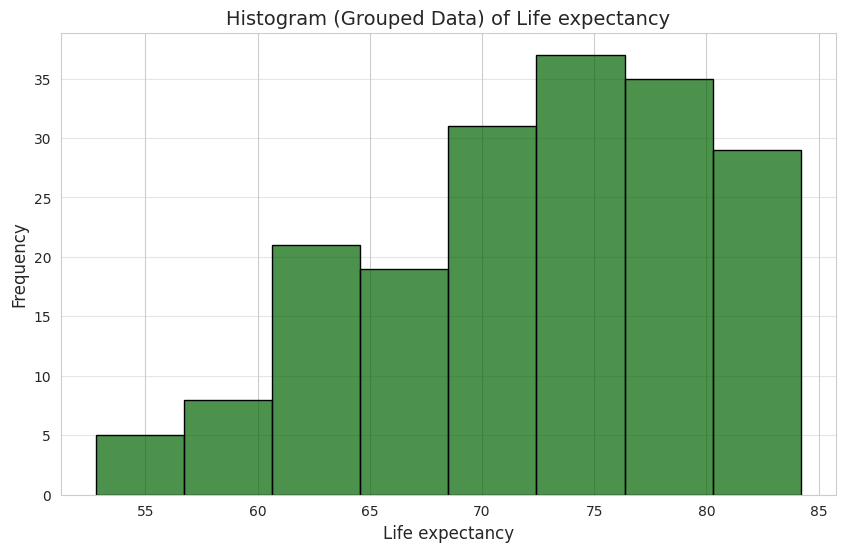

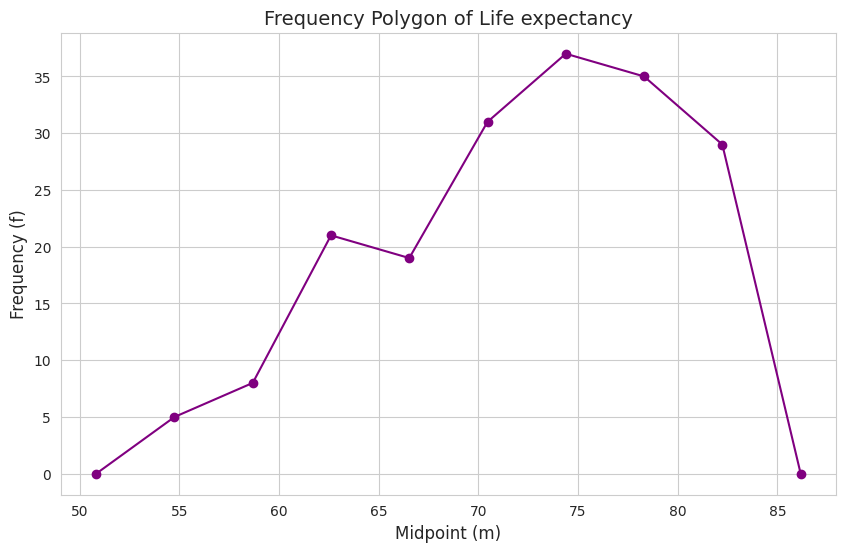

In [ ]:
print("\n[C] GROUPED DATA GRAPHICAL REPRESENTATION")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[GROUP_VAR], bins=bins, kde=False, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title(f'Histogram (Grouped Data) of {GROUP_VAR}')
plt.xlabel(GROUP_VAR)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Frequency Polygon
plt.figure(figsize=(10, 6))
poly_m = [midpoints[0] - class_width] + midpoints + [midpoints[-1] + class_width]
poly_f = [0] + frequency_table['Frequency (f)'].tolist() + [0]
plt.plot(poly_m, poly_f, marker='o', linestyle='-', color='purple')
plt.title(f'Frequency Polygon of {GROUP_VAR}')
plt.xlabel('Midpoint (m)')
plt.ylabel('Frequency (f)')
plt.grid(True)
plt.show()


--- FINAL SUMMARY OF ANALYSIS ---

1️⃣ Raw Data Summary Statistics:


,Count,Mean,Std Dev (σ),Min,Median (Q2),Max,Range,Variance (σ²),Skewness,Kurtosis,Mode
Life expectancy,185.0,72.29,7.380000e+00,52.8,73.20,8.420000e+01,3.140000e+01,5.451000e+01,-0.55,-0.36,76.5
Birth Rate,185.0,20.36,9.840000e+00,6.4,18.07,4.608000e+01,3.968000e+01,9.685000e+01,0.59,-0.80,10.0
Population,185.0,41220439.04,1.483497e+08,18233.0,9466856.00,1.397715e+09,1.397697e+09,2.200762e+16,8.20,72.10,18233.0
Co2-Emissions,185.0,180670.54,8.452934e+05,51.0,12963.00,9.893038e+06,9.892987e+06,7.145209e+11,9.50,101.12,143.0
Forested Area (%),185.0,32.17,2.387000e+01,0.0,31.80,9.830000e+01,9.830000e+01,5.696300e+02,0.52,-0.47,12.6



2️⃣ Correlation Matrix:


,Life expectancy,Birth Rate,Population,Co2-Emissions,Forested Area (%)
Life expectancy,1.00,-0.87,0.01,0.12,0.02
Birth Rate,-0.87,1.00,-0.06,-0.16,-0.08
Population,0.01,-0.06,1.00,0.81,-0.06
Co2-Emissions,0.12,-0.16,0.81,1.00,-0.03
Forested Area (%),0.02,-0.08,-0.06,-0.03,1.00


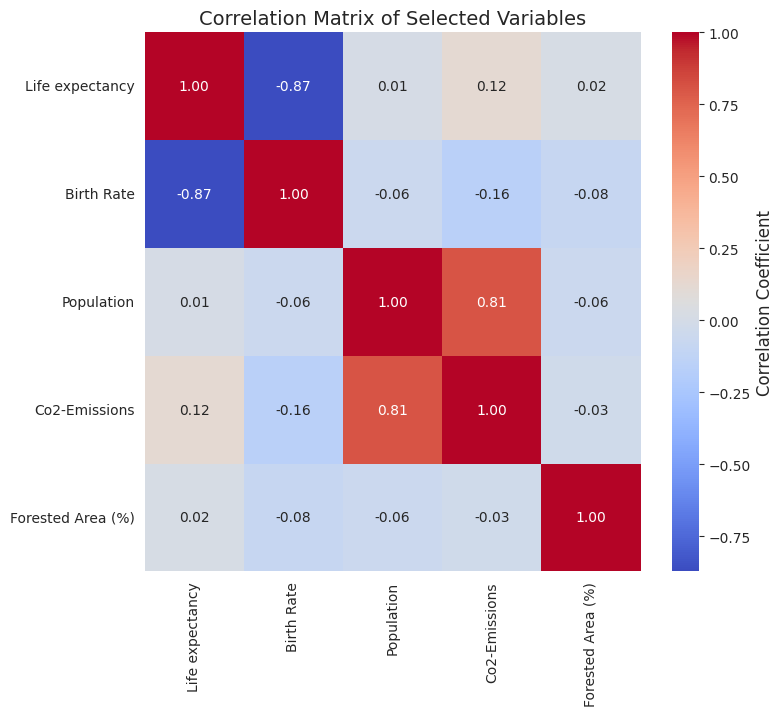


3️⃣ Histograms and Boxplots:


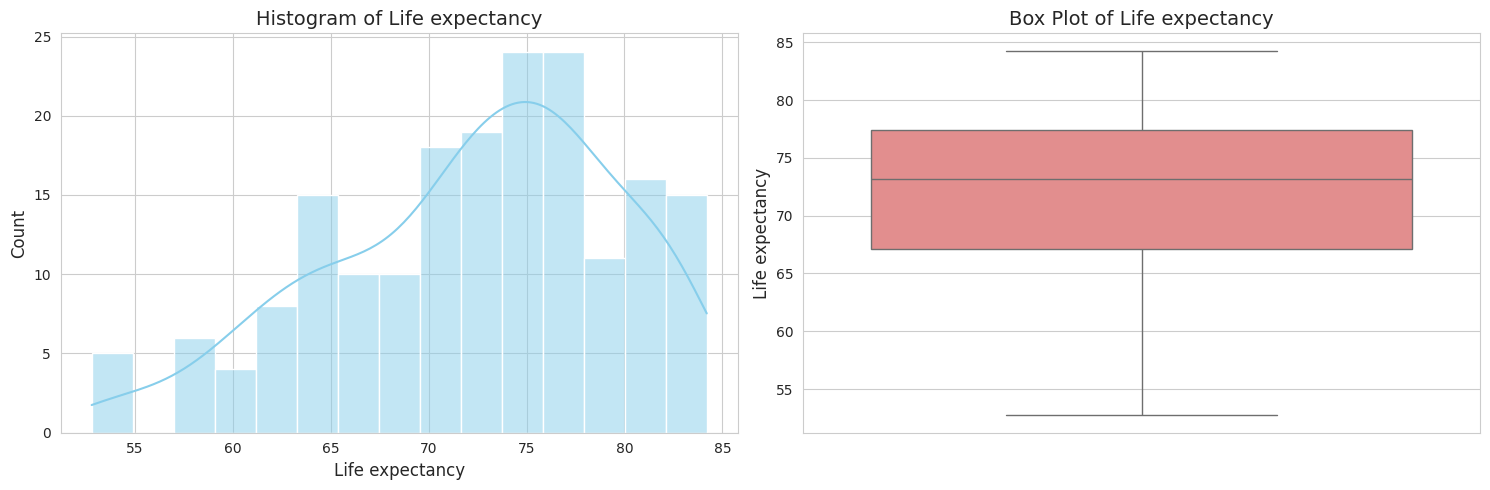

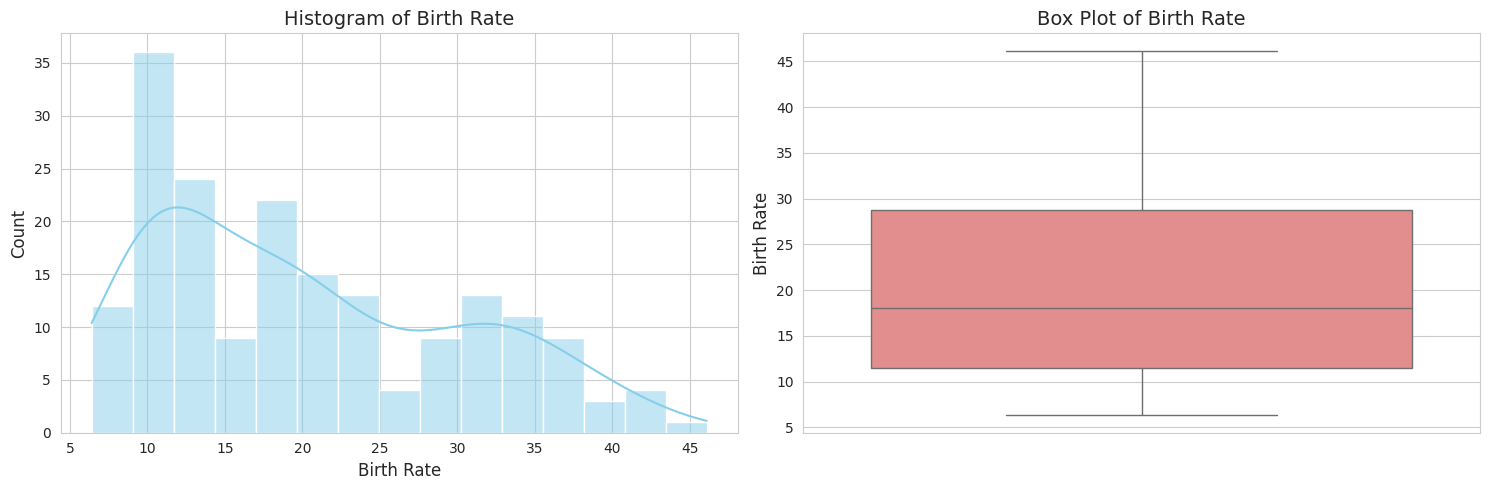

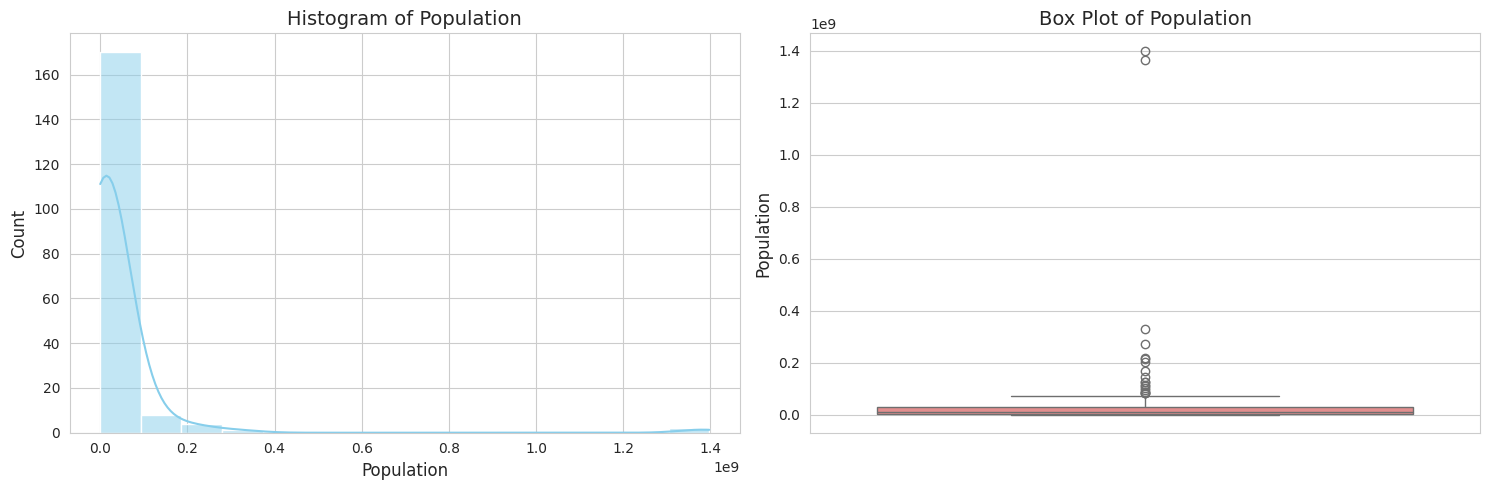

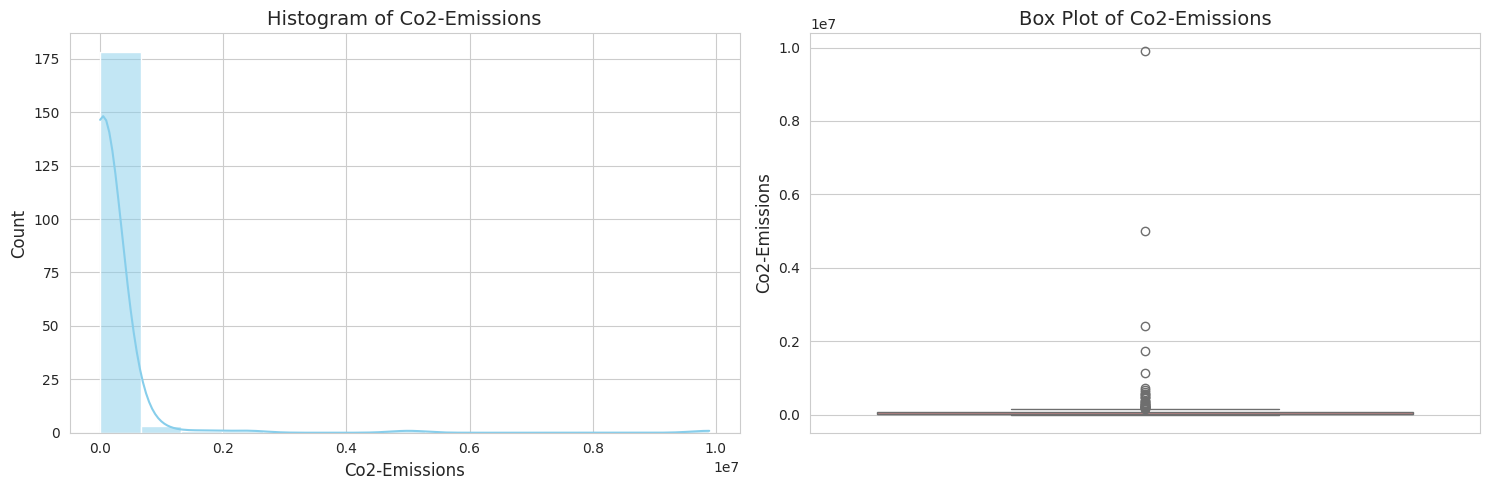


Top 10 Countries by Population:


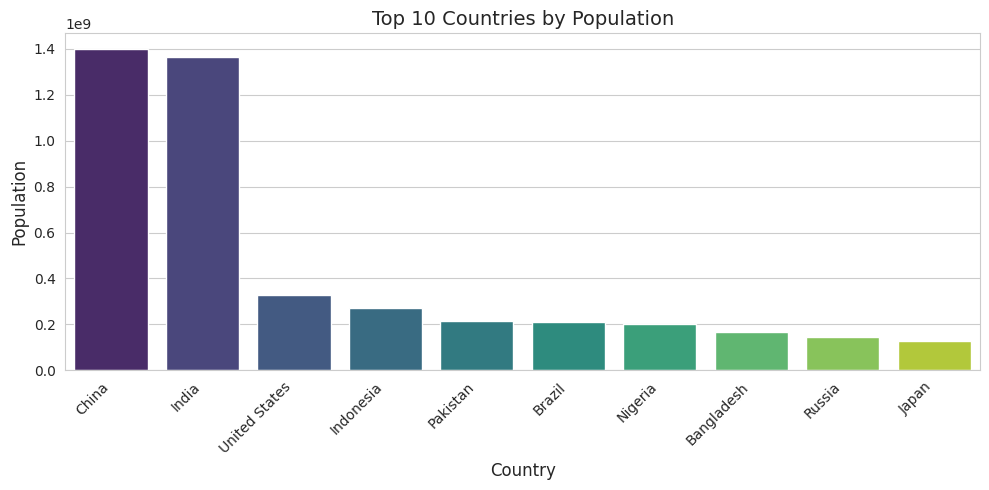


Distribution of Forested Area Categories:


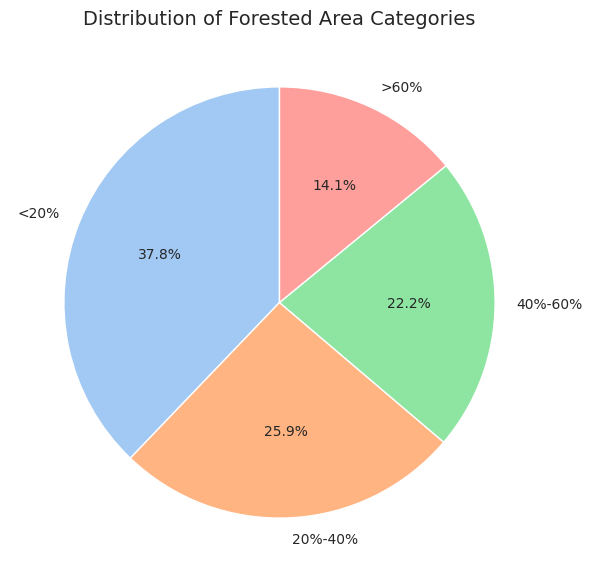


5️⃣ Grouped Data Frequency Table for Life Expectancy:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,0.00 - 12.29,49,6.14375,0.264865,49
1,12.29 - 24.57,30,18.43125,0.162162,79
2,24.57 - 36.86,33,30.71875,0.178378,112
3,36.86 - 49.15,27,43.00625,0.145946,139
4,49.15 - 61.44,21,55.29375,0.113514,160
5,61.44 - 73.72,16,67.58125,0.086486,176
6,73.72 - 86.01,4,79.86875,0.021622,180
7,86.01 - 98.30,5,92.15675,0.027027,185


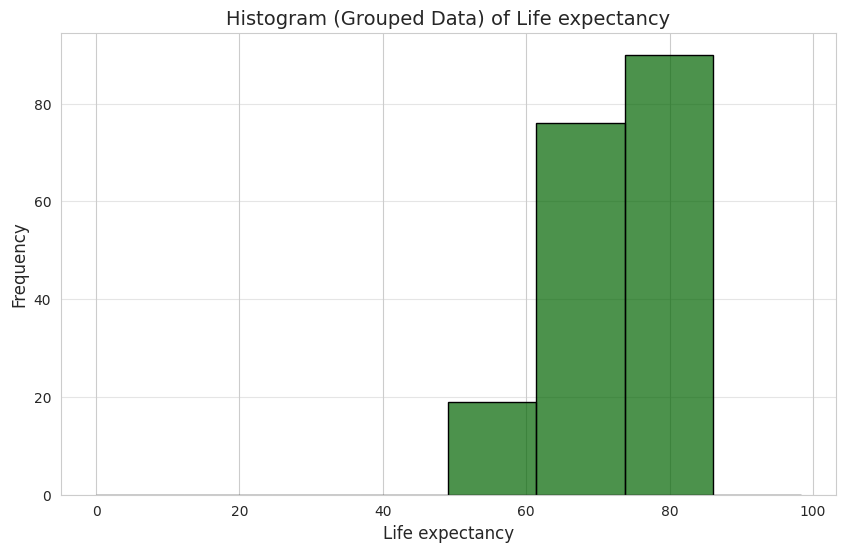

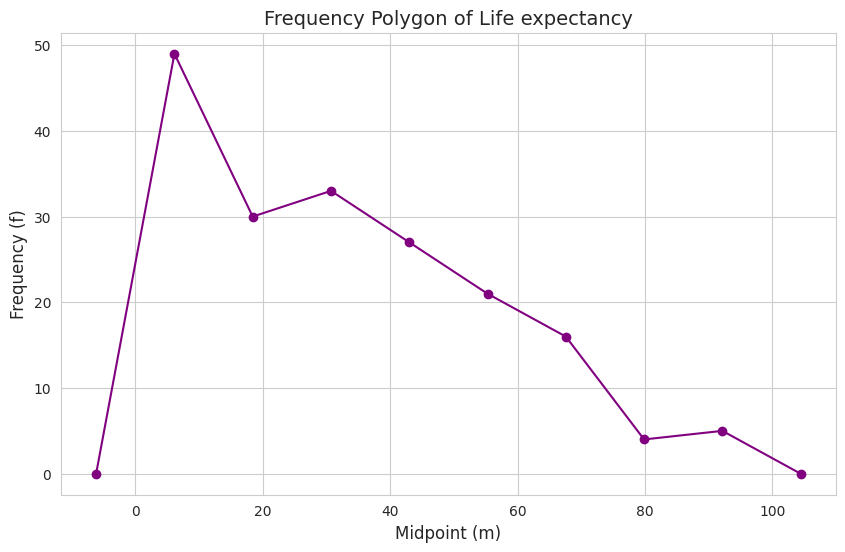


Grouped Data Mean: 72.35
Raw Data Mean: 72.29
Difference (Raw - Grouped): -0.06

✅ Analysis Complete. All key tables and visualizations are displayed above.


In [ ]:
print("--- FINAL SUMMARY OF ANALYSIS ---")

# 1️⃣ Raw Data Summary Statistics
print("\n1️⃣ Raw Data Summary Statistics:")
display(raw_stats.round(2))  # Nice table view in Colab

# 2️⃣ Correlation Matrix
print("\n2️⃣ Correlation Matrix:")
display(correlation_matrix.round(2))

# Heatmap of correlation
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Selected Variables')
plt.show()

# 3️⃣ Histograms & Boxplots
print("\n3️⃣ Histograms and Boxplots:")
for col in SELECTED_VARS[:4]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df_clean[col], kde=True, ax=axes[0], color='skyblue', bins=15)
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)

    sns.boxplot(y=df_clean[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# 4️⃣ Bar Chart & Pie Chart
if 'Country' in df_clean.columns:
    print("\nTop 10 Countries by Population:")
    top_pop = df_clean.sort_values('Population', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Country', y='Population', data=top_pop, palette='viridis')
    plt.title('Top 10 Countries by Population')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nDistribution of Forested Area Categories:")
plt.figure(figsize=(7, 7))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Forested Area Categories')
plt.show()

# 5️⃣ Grouped Data Frequency Table
print("\n5️⃣ Grouped Data Frequency Table for Life Expectancy:")
display(frequency_table)

# 6️⃣ Grouped Data Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[GROUP_VAR], bins=bins, kde=False, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title(f'Histogram (Grouped Data) of {GROUP_VAR}')
plt.xlabel(GROUP_VAR)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 7️⃣ Frequency Polygon
plt.figure(figsize=(10, 6))
plt.plot(poly_m, poly_f, marker='o', linestyle='-', color='purple')
plt.title(f'Frequency Polygon of {GROUP_VAR}')
plt.xlabel('Midpoint (m)')
plt.ylabel('Frequency (f)')
plt.grid(True)
plt.show()

# 8️⃣ Grouped Mean vs Raw Mean
print(f"\nGrouped Data Mean: {grouped_mean:.2f}")
print(f"Raw Data Mean: {raw_stats.loc[GROUP_VAR, 'Mean']:.2f}")
print(f"Difference (Raw - Grouped): {raw_stats.loc[GROUP_VAR, 'Mean'] - grouped_mean:.2f}")

print("\n✅ Analysis Complete. All key tables and visualizations are displayed above.")


--- GROUPED DATA ANALYSIS FOR ALL VARIABLES ---

--- Grouped Analysis: Life expectancy ---

Grouped Frequency Table:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency,Cumulative Frequency
0,52.80 - 56.72,5,54.7625,0.027027,5
1,56.72 - 60.65,8,58.6875,0.043243,13
2,60.65 - 64.58,21,62.6125,0.113514,34
3,64.58 - 68.50,19,66.5375,0.102703,53
4,68.50 - 72.42,31,70.4625,0.167568,84
5,72.42 - 76.35,37,74.3875,0.200000,121
6,76.35 - 80.28,35,78.3125,0.189189,156
7,80.28 - 84.20,29,82.2380,0.156757,185


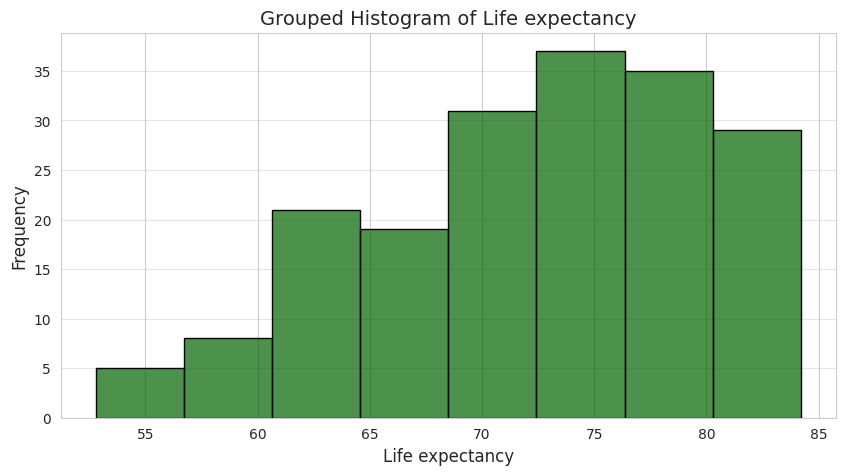

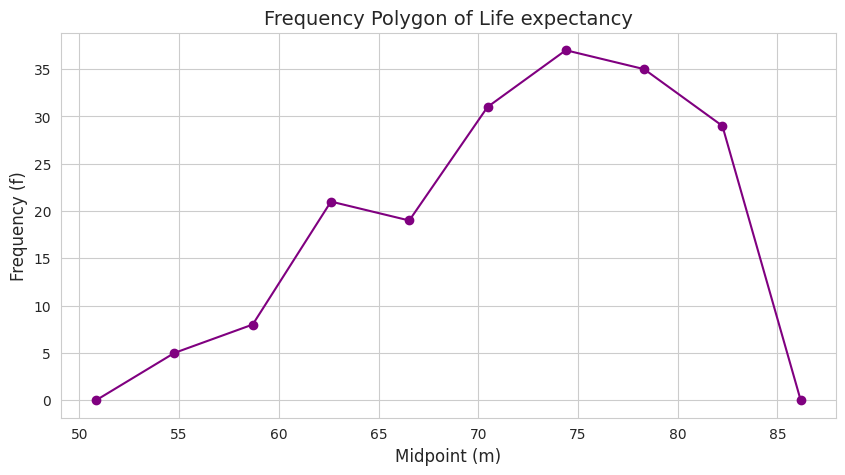

--- Grouped Analysis: Birth Rate ---

Grouped Frequency Table:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency,Cumulative Frequency
0,6.40 - 11.36,45,8.8800,0.243243,45
1,11.36 - 16.32,33,13.8400,0.178378,78
2,16.32 - 21.28,34,18.8000,0.183784,112
3,21.28 - 26.24,19,23.7600,0.102703,131
4,26.24 - 31.20,17,28.7200,0.091892,148
5,31.20 - 36.16,21,33.6800,0.113514,169
6,36.16 - 41.12,11,38.6400,0.059459,180
7,41.12 - 46.08,5,43.6005,0.027027,185


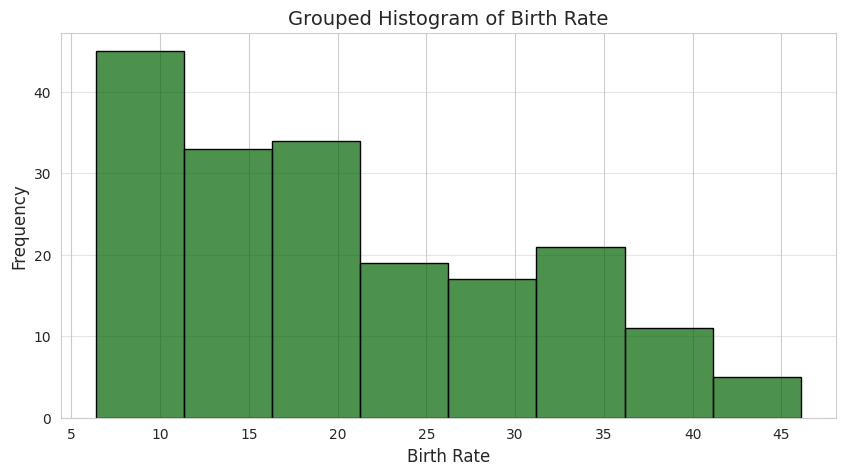

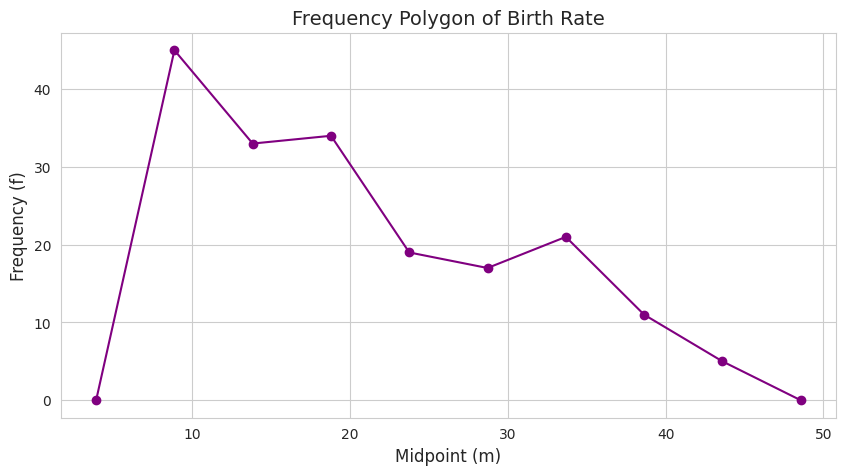

--- Grouped Analysis: Population ---

Grouped Frequency Table:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency,Cumulative Frequency
0,18233.00 - 174730328.88,178,8.737428e+07,0.962162,178
1,174730328.88 - 349442424.75,5,2.620864e+08,0.027027,183
2,349442424.75 - 524154520.62,0,4.367985e+08,0.000000,183
3,524154520.62 - 698866616.50,0,6.115106e+08,0.000000,183
4,698866616.50 - 873578712.38,0,7.862227e+08,0.000000,183
5,873578712.38 - 1048290808.25,0,9.609348e+08,0.000000,183
6,1048290808.25 - 1223002904.12,0,1.135647e+09,0.000000,183
7,1223002904.12 - 1397715000.00,2,1.310359e+09,0.010811,185


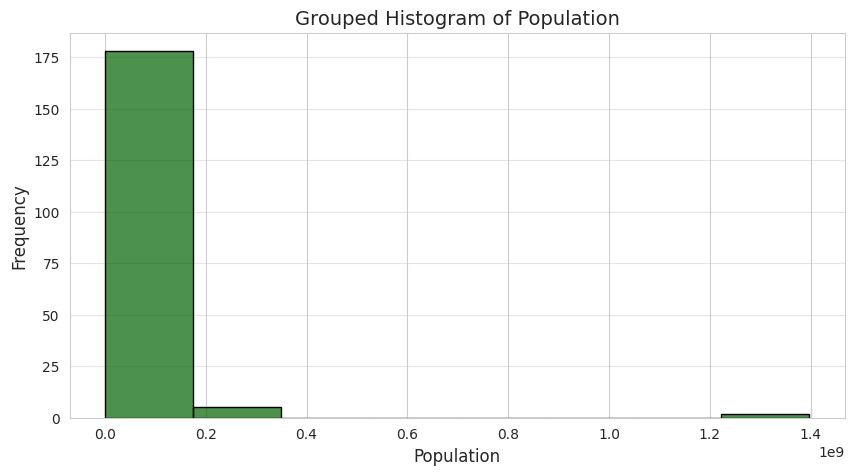

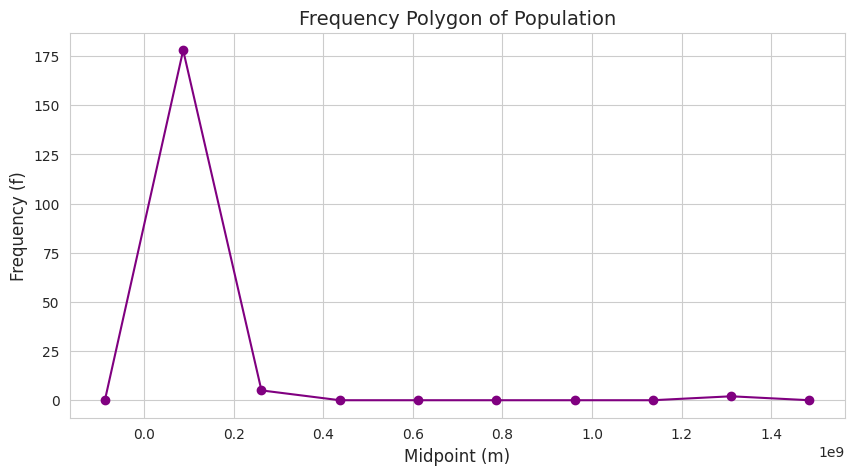

--- Grouped Analysis: Co2-Emissions ---

Grouped Frequency Table:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency,Cumulative Frequency
0,51.00 - 1236674.38,181,6.183627e+05,0.978378,181
1,1236674.38 - 2473297.75,2,1.854986e+06,0.010811,183
2,2473297.75 - 3709921.12,0,3.091609e+06,0.000000,183
3,3709921.12 - 4946544.50,0,4.328233e+06,0.000000,183
4,4946544.50 - 6183167.88,1,5.564856e+06,0.005405,184
5,6183167.88 - 7419791.25,0,6.801480e+06,0.000000,184
6,7419791.25 - 8656414.62,0,8.038103e+06,0.000000,184
7,8656414.62 - 9893038.00,1,9.274726e+06,0.005405,185


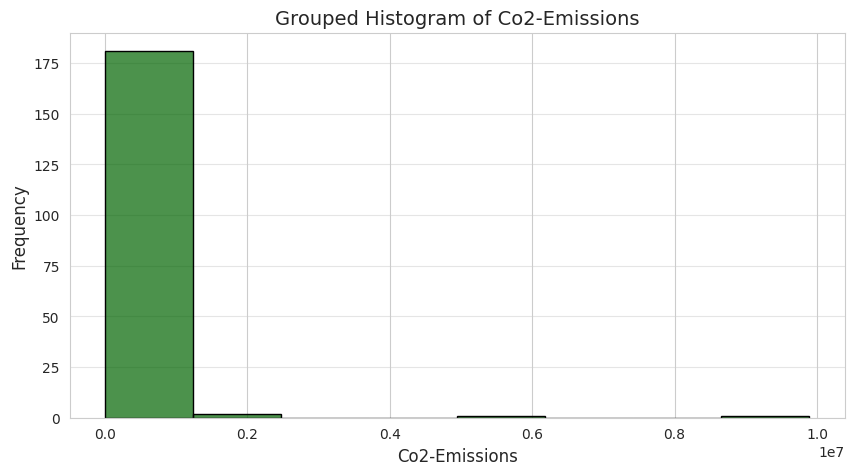

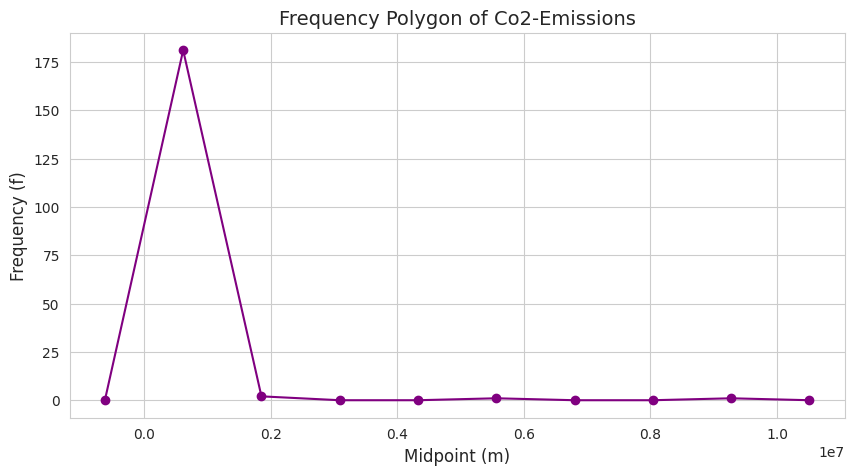

--- Grouped Analysis: Forested Area (%) ---

Grouped Frequency Table:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency,Cumulative Frequency
0,0.00 - 12.29,49,6.14375,0.264865,49
1,12.29 - 24.57,30,18.43125,0.162162,79
2,24.57 - 36.86,33,30.71875,0.178378,112
3,36.86 - 49.15,27,43.00625,0.145946,139
4,49.15 - 61.44,21,55.29375,0.113514,160
5,61.44 - 73.72,16,67.58125,0.086486,176
6,73.72 - 86.01,4,79.86875,0.021622,180
7,86.01 - 98.30,5,92.15675,0.027027,185


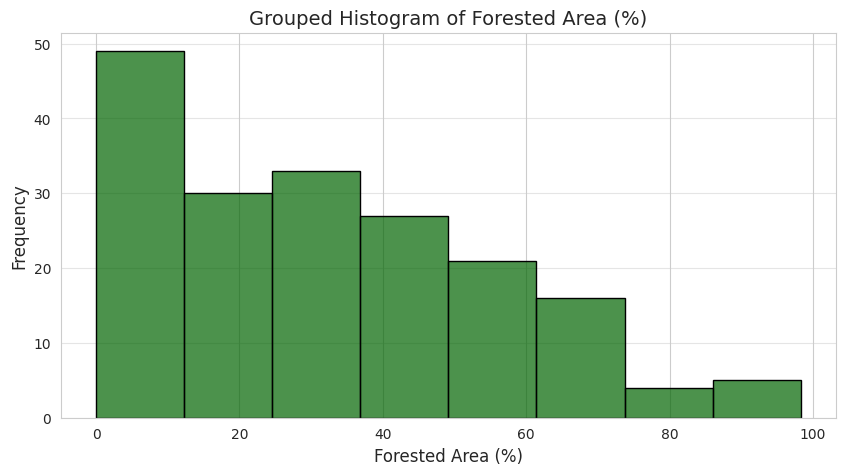

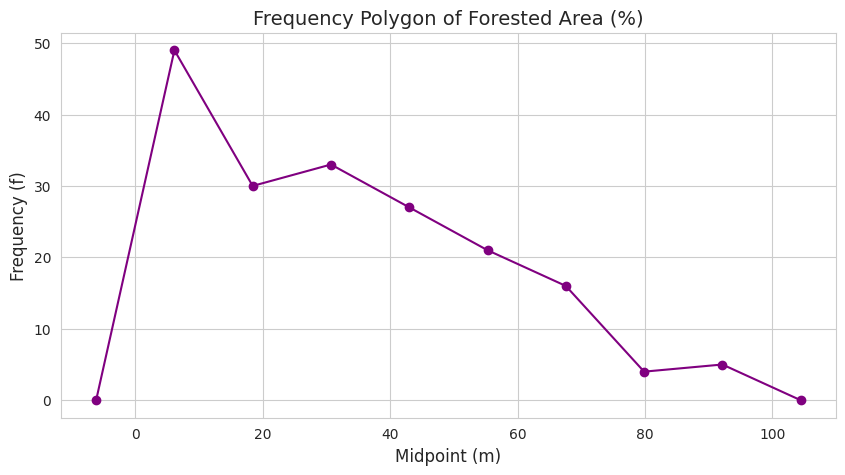


--- Descriptive Statistics Table for Grouped Data ---


,Variable,Grouped Mean,Grouped Median,Raw Mean,Raw Median,Difference Mean (Raw - Grouped),Difference Median (Raw - Grouped)
0,Life expectancy,7.235000e+01,73.33,72.29,73.20,-0.06,-0.13
1,Birth Rate,2.046000e+01,18.44,20.36,18.07,-0.11,-0.37
2,Population,1.053177e+08,90809631.14,41220439.04,9466856.00,-64097246.34,-81342775.14
3,Co2-Emissions,7.052606e+05,632027.03,180670.54,12963.00,-524590.01,-619064.03
4,Forested Area (%),3.271000e+01,29.60,32.17,31.80,-0.54,2.20


In [ ]:
print("--- GROUPED DATA ANALYSIS FOR ALL VARIABLES ---\n")

NUM_BINS = 8  # Number of bins for grouping
grouped_summary_list = []

for var in SELECTED_VARS:
    print(f"--- Grouped Analysis: {var} ---\n")

    # 1️⃣ Create bins
    min_val = df_clean[var].min()
    max_val = df_clean[var].max()
    bins = np.linspace(min_val, max_val, NUM_BINS + 1)
    bins[-1] += 0.001  # include max value
    bin_labels = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(NUM_BINS)]

    grouped_col_name = f'Grouped_{var.replace(" ", "_")}'
    df_clean[grouped_col_name] = pd.cut(df_clean[var], bins=bins, labels=bin_labels, include_lowest=True, right=False)

    # 2️⃣ Frequency table
    freq_table = df_clean[grouped_col_name].value_counts().sort_index().reset_index()
    freq_table.columns = ['Class Interval', 'Frequency (f)']
    freq_table = freq_table[freq_table['Class Interval'].notna()]
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(NUM_BINS)]
    freq_table['Midpoint (m)'] = midpoints
    freq_table['Relative Frequency'] = freq_table['Frequency (f)'] / freq_table['Frequency (f)'].sum()
    freq_table['Cumulative Frequency'] = freq_table['Frequency (f)'].cumsum()

    print("Grouped Frequency Table:")
    display(freq_table)

    # 3️⃣ Grouped mean
    grouped_mean = (freq_table['Frequency (f)'] * freq_table['Midpoint (m)']).sum() / freq_table['Frequency (f)'].sum()

    # 4️⃣ Grouped median
    N = freq_table['Frequency (f)'].sum()
    median_class_index = freq_table[freq_table['Cumulative Frequency'] >= N/2].index[0]
    L = bins[median_class_index]
    CF_b = 0 if median_class_index == 0 else freq_table.loc[median_class_index - 1, 'Cumulative Frequency']
    f_m = freq_table.loc[median_class_index, 'Frequency (f)']
    h = bins[1] - bins[0]
    grouped_median = L + ((N/2 - CF_b) / f_m) * h

    # 5️⃣ Histogram (Grouped)
    plt.figure(figsize=(10, 5))
    sns.histplot(df_clean[var], bins=bins, kde=False, color='darkgreen', edgecolor='black', alpha=0.7)
    plt.title(f'Grouped Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    # 6️⃣ Frequency polygon
    plt.figure(figsize=(10, 5))
    poly_m = [midpoints[0] - h] + midpoints + [midpoints[-1] + h]
    poly_f = [0] + freq_table['Frequency (f)'].tolist() + [0]
    plt.plot(poly_m, poly_f, marker='o', linestyle='-', color='purple')
    plt.title(f'Frequency Polygon of {var}')
    plt.xlabel('Midpoint (m)')
    plt.ylabel('Frequency (f)')
    plt.grid(True)
    plt.show()

    # 7️⃣ Store summary for table
    grouped_summary_list.append({
        'Variable': var,
        'Grouped Mean': round(grouped_mean, 2),
        'Grouped Median': round(grouped_median, 2),
        'Raw Mean': round(raw_stats.loc[var, 'Mean'], 2),
        'Raw Median': round(raw_stats.loc[var, 'Median (Q2)'], 2),
        'Difference Mean (Raw - Grouped)': round(raw_stats.loc[var, 'Mean'] - grouped_mean, 2),
        'Difference Median (Raw - Grouped)': round(raw_stats.loc[var, 'Median (Q2)'] - grouped_median, 2)
    })

# 8️⃣ Descriptive Table of Grouped Data
grouped_desc_table = pd.DataFrame(grouped_summary_list)
print("\n--- Descriptive Statistics Table for Grouped Data ---")
display(grouped_desc_table)


In [ ]:
import pandas as pd
import numpy as np

NUM_BINS = 8  # Number of bins for grouping
compact_grouped_summary = []

for var in SELECTED_VARS:
    # Create bins
    min_val = df_clean[var].min()
    max_val = df_clean[var].max()
    bins = np.linspace(min_val, max_val, NUM_BINS + 1)
    bins[-1] += 0.001  # include max value

    # Group the data
    grouped_col_name = f'Grouped_{var.replace(" ", "_")}'
    df_clean[grouped_col_name] = pd.cut(df_clean[var], bins=bins, include_lowest=True, right=False)

    # Frequency table
    freq_table = df_clean[grouped_col_name].value_counts().sort_index().reset_index()
    freq_table.columns = ['Class Interval', 'Frequency (f)']
    freq_table = freq_table[freq_table['Class Interval'].notna()]

    # Midpoints
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(NUM_BINS)]

    # Grouped mean
    grouped_mean = (freq_table['Frequency (f)'] * midpoints).sum() / freq_table['Frequency (f)'].sum()

    # Grouped median
    cum_freq = freq_table['Frequency (f)'].cumsum()
    N = cum_freq.iloc[-1]
    median_class_index = cum_freq.searchsorted(N/2)  # returns a scalar index
    if isinstance(median_class_index, np.ndarray):
        median_class_index = median_class_index[0]  # ensure scalar

    L = bins[median_class_index]  # lower boundary of median class
    CF_b = 0 if median_class_index == 0 else cum_freq.iloc[median_class_index - 1]
    f_m = freq_table.loc[median_class_index, 'Frequency (f)']
    h = bins[1] - bins[0]
    grouped_median = L + ((N/2 - CF_b) / f_m) * h

    # Append summary
    compact_grouped_summary.append({
        'Variable': var,
        'Grouped Mean': round(grouped_mean, 2),
        'Grouped Median': round(grouped_median, 2)
    })

# Create final table
compact_grouped_table = pd.DataFrame(compact_grouped_summary)
compact_grouped_table


,Variable,Grouped Mean,Grouped Median
0,Life expectancy,7.235000e+01,73.33
1,Birth Rate,2.046000e+01,18.44
2,Population,1.053177e+08,90809631.14
3,Co2-Emissions,7.052606e+05,632027.03
4,Forested Area (%),3.271000e+01,29.60


--- FINAL SUMMARY OF ANALYSIS WITH GROUPED MEDIAN ---

🔹 Variable: Life expectancy
Raw Mean: 72.29, Grouped Mean: 72.35, Difference: -0.06
Raw Median: 73.20, Grouped Median: 73.33, Difference: -0.13


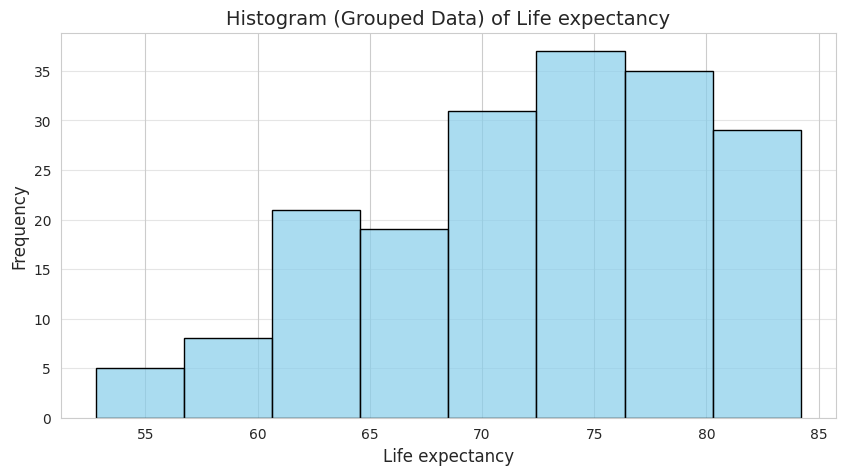

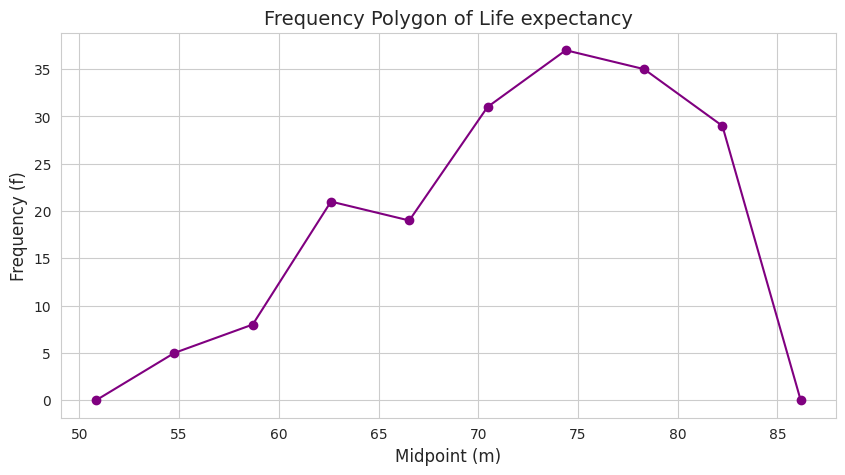


🔹 Variable: Birth Rate
Raw Mean: 20.36, Grouped Mean: 20.46, Difference: -0.11
Raw Median: 18.07, Grouped Median: 18.44, Difference: -0.37


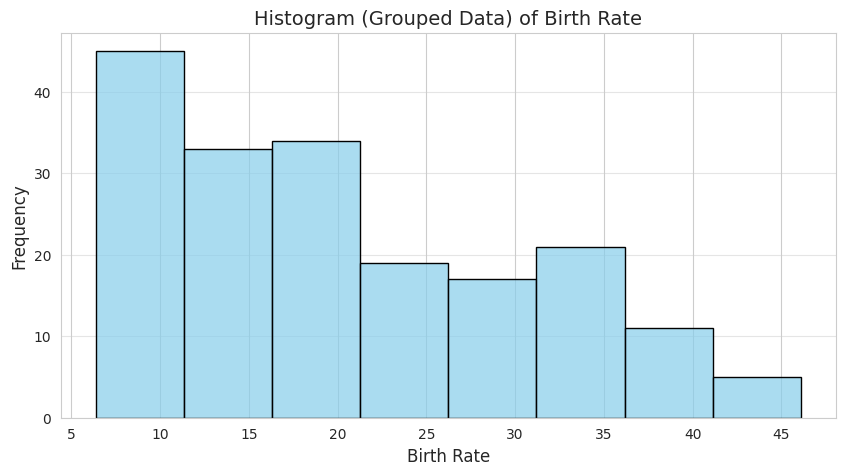

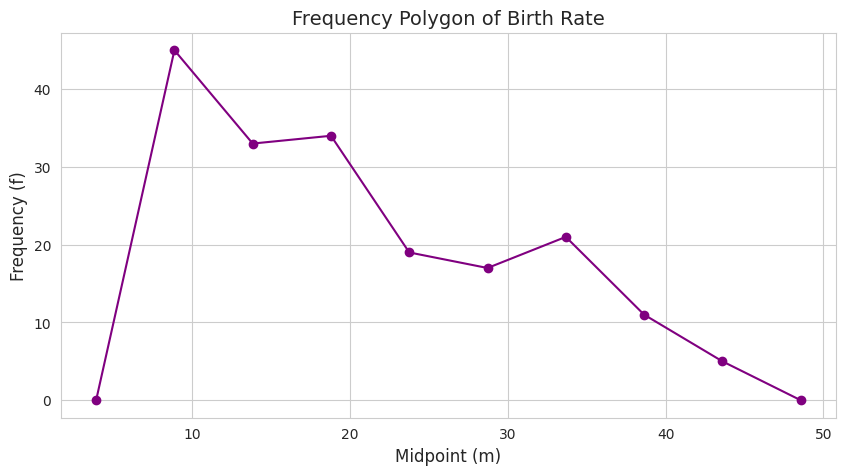


🔹 Variable: Population
Raw Mean: 41220439.04, Grouped Mean: 105317685.38, Difference: -64097246.34
Raw Median: 9466856.00, Grouped Median: 90809631.14, Difference: -81342775.14


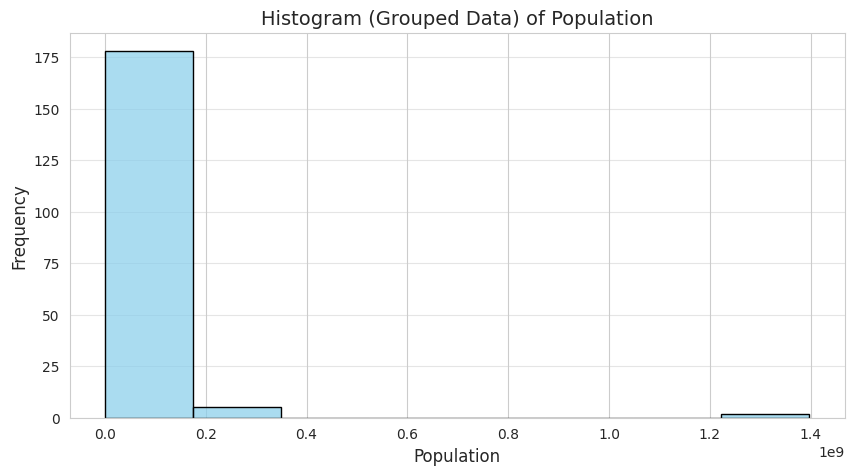

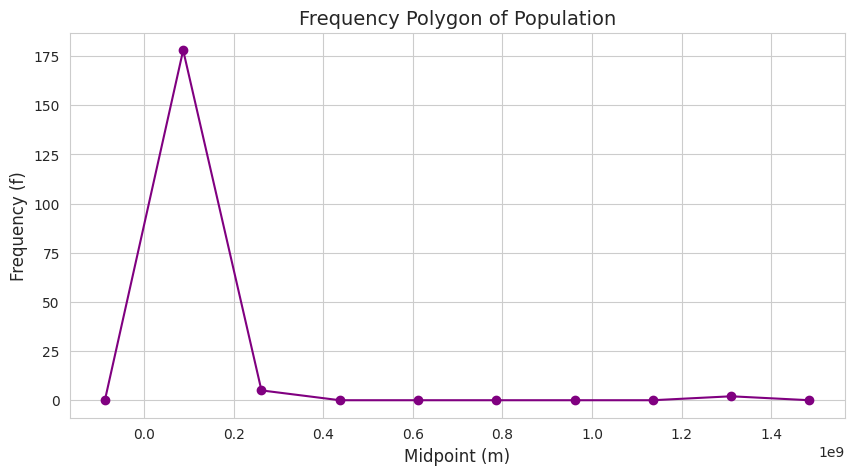


🔹 Variable: Co2-Emissions
Raw Mean: 180670.54, Grouped Mean: 705260.55, Difference: -524590.01
Raw Median: 12963.00, Grouped Median: 632027.03, Difference: -619064.03


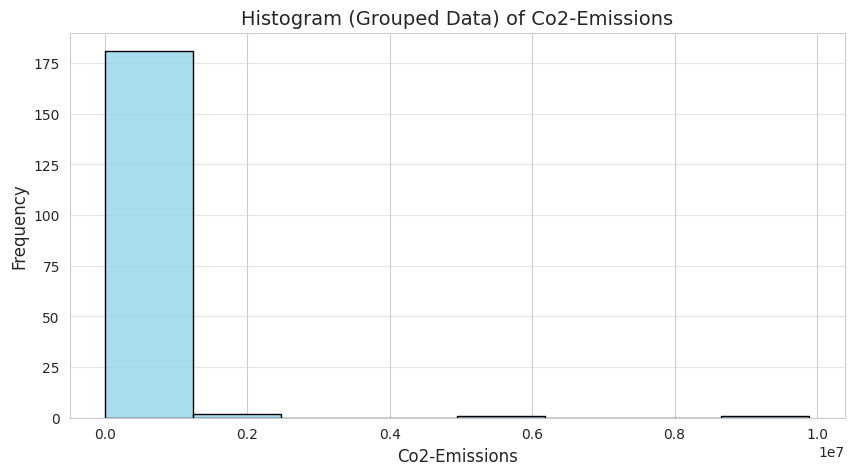

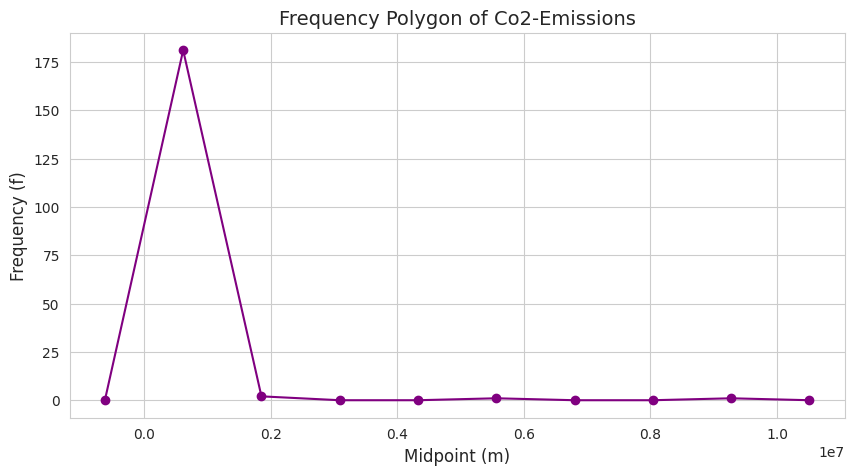


🔹 Variable: Forested Area (%)
Raw Mean: 32.17, Grouped Mean: 32.71, Difference: -0.54
Raw Median: 31.80, Grouped Median: 29.60, Difference: 2.20


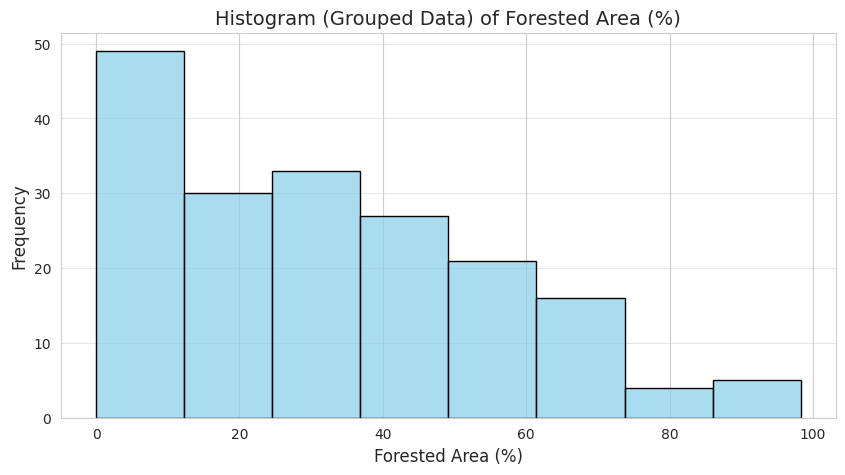

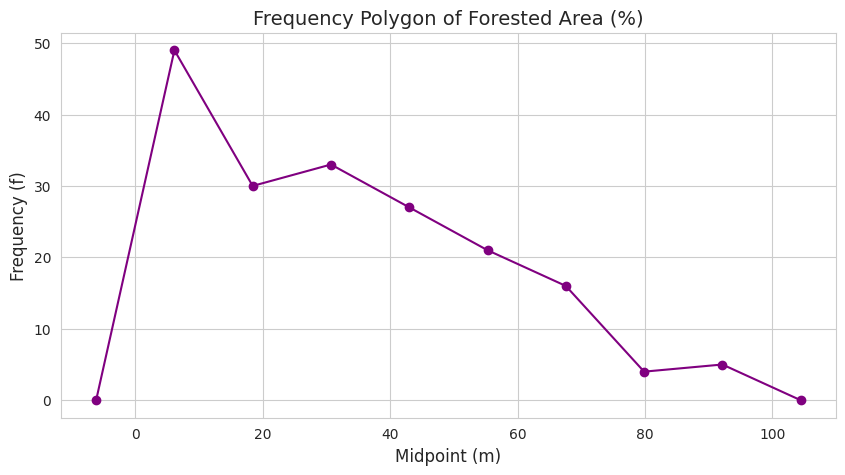


✅ Analysis Complete. Grouped Mean and Median compared with Raw Data for all variables.


In [ ]:
print("--- FINAL SUMMARY OF ANALYSIS WITH GROUPED MEDIAN ---")

NUM_BINS = 8  # Make sure the same binning is used

for var in SELECTED_VARS:
    print(f"\n🔹 Variable: {var}")

    # --- Raw Statistics ---
    raw_mean = raw_stats.loc[var, 'Mean']
    raw_median = raw_stats.loc[var, 'Median (Q2)']

    # --- Grouped Data ---
    # Create bins
    min_val = df_clean[var].min()
    max_val = df_clean[var].max()
    range_val = max_val - min_val
    class_width = round(range_val / NUM_BINS, 2)
    bins = np.linspace(min_val, max_val, NUM_BINS + 1)
    bins[-1] += 0.001  # include max value
    bin_labels = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(NUM_BINS)]

    grouped_col_name = f'Grouped_{var.replace(" ", "_")}'
    df_clean[grouped_col_name] = pd.cut(df_clean[var], bins=bins, labels=bin_labels, include_lowest=True, right=False)

    # Frequency table
    freq_table = df_clean[grouped_col_name].value_counts().sort_index().reset_index()
    freq_table.columns = ['Class Interval', 'Frequency (f)']
    freq_table = freq_table[freq_table['Class Interval'].notna()]
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(NUM_BINS)]
    freq_table['Midpoint (m)'] = midpoints
    freq_table['Cumulative Frequency (cf)'] = freq_table['Frequency (f)'].cumsum()

    # Grouped Mean
    grouped_mean = (freq_table['Frequency (f)'] * freq_table['Midpoint (m)']).sum() / freq_table['Frequency (f)'].sum()

    # --- Grouped Median Calculation ---
    N = freq_table['Frequency (f)'].sum()
    median_class_index = freq_table[freq_table['Cumulative Frequency (cf)'] >= N/2].index[0]

    L = bins[median_class_index]  # lower boundary of median class
    CF_b = 0 if median_class_index == 0 else freq_table.loc[median_class_index - 1, 'Cumulative Frequency (cf)']
    f_m = freq_table.loc[median_class_index, 'Frequency (f)']
    h = bins[1] - bins[0]  # class width

    grouped_median = L + ((N/2 - CF_b) / f_m) * h

    # --- Display Results ---
    print(f"Raw Mean: {raw_mean:.2f}, Grouped Mean: {grouped_mean:.2f}, Difference: {raw_mean - grouped_mean:.2f}")
    print(f"Raw Median: {raw_median:.2f}, Grouped Median: {grouped_median:.2f}, Difference: {raw_median - grouped_median:.2f}")

    # Optional: Histogram for grouped data
    plt.figure(figsize=(10, 5))
    sns.histplot(df_clean[var], bins=bins, kde=False, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram (Grouped Data) of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    # Optional: Frequency polygon
    plt.figure(figsize=(10, 5))
    poly_m = [midpoints[0] - h] + midpoints + [midpoints[-1] + h]
    poly_f = [0] + freq_table['Frequency (f)'].tolist() + [0]
    plt.plot(poly_m, poly_f, marker='o', linestyle='-', color='purple')
    plt.title(f'Frequency Polygon of {var}')
    plt.xlabel('Midpoint (m)')
    plt.ylabel('Frequency (f)')
    plt.grid(True)
    plt.show()

print("\n✅ Analysis Complete. Grouped Mean and Median compared with Raw Data for all variables.")


--- 3. GROUPED DATA ANALYSIS FOR ALL VARIABLES ---

🔹 Grouped Frequency Analysis for: Life expectancy

Frequency Table for Life expectancy:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,52.80 - 56.72,5,54.7625,0.027027,5
1,56.72 - 60.65,8,58.6875,0.043243,13
2,60.65 - 64.58,21,62.6125,0.113514,34
3,64.58 - 68.50,19,66.5375,0.102703,53
4,68.50 - 72.42,31,70.4625,0.167568,84
5,72.42 - 76.35,37,74.3875,0.200000,121
6,76.35 - 80.28,35,78.3125,0.189189,156
7,80.28 - 84.20,29,82.2380,0.156757,185


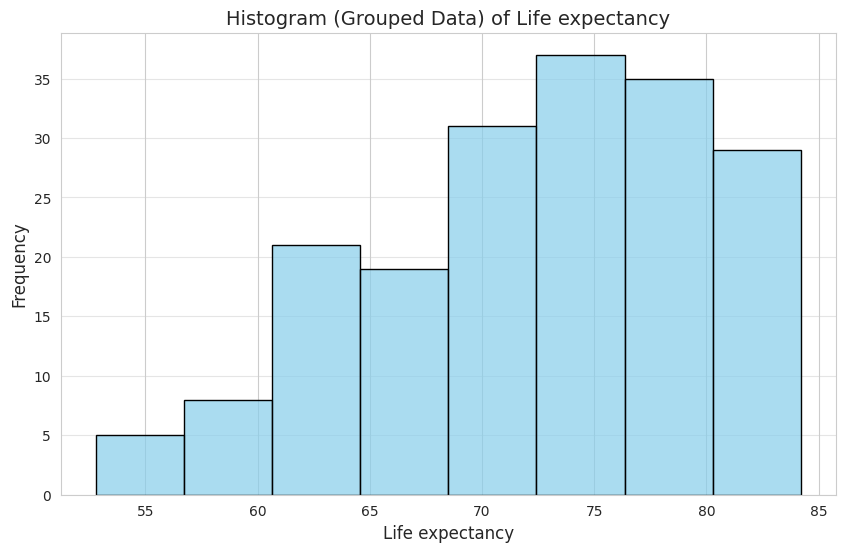

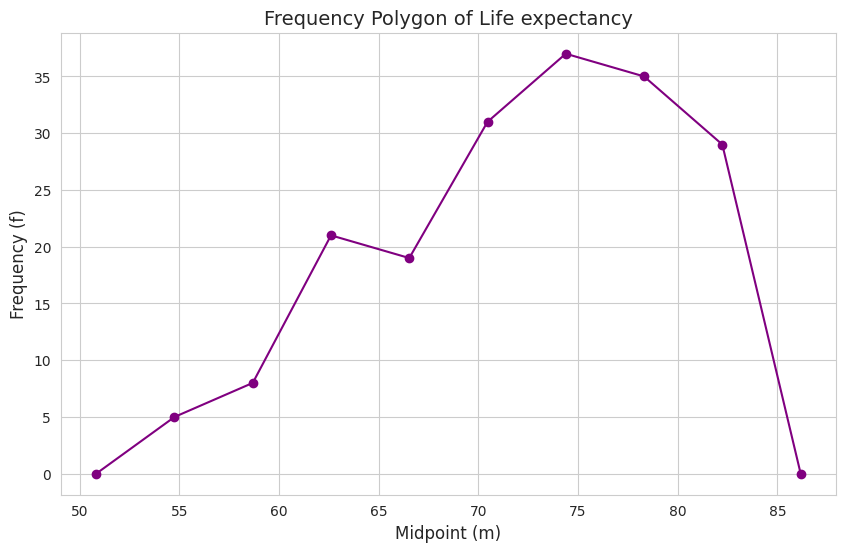


🔹 Grouped Frequency Analysis for: Birth Rate

Frequency Table for Birth Rate:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,6.40 - 11.36,45,8.8800,0.243243,45
1,11.36 - 16.32,33,13.8400,0.178378,78
2,16.32 - 21.28,34,18.8000,0.183784,112
3,21.28 - 26.24,19,23.7600,0.102703,131
4,26.24 - 31.20,17,28.7200,0.091892,148
5,31.20 - 36.16,21,33.6800,0.113514,169
6,36.16 - 41.12,11,38.6400,0.059459,180
7,41.12 - 46.08,5,43.6005,0.027027,185


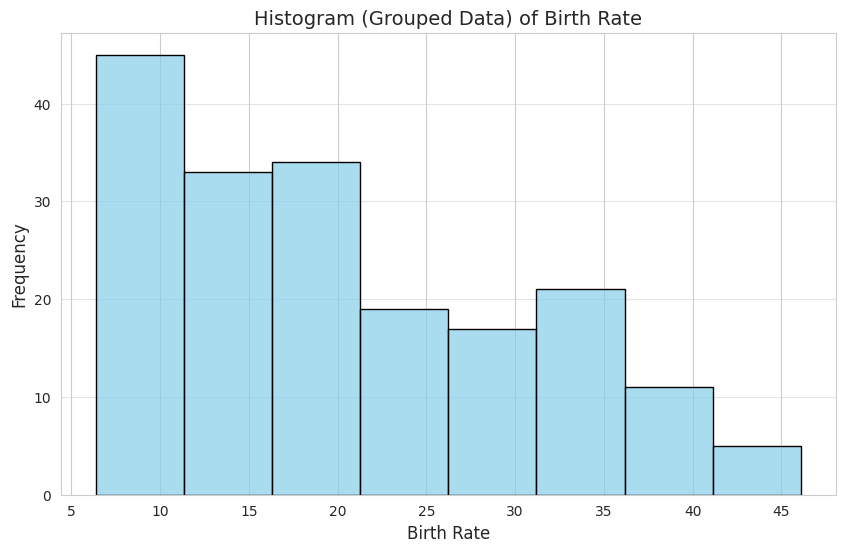

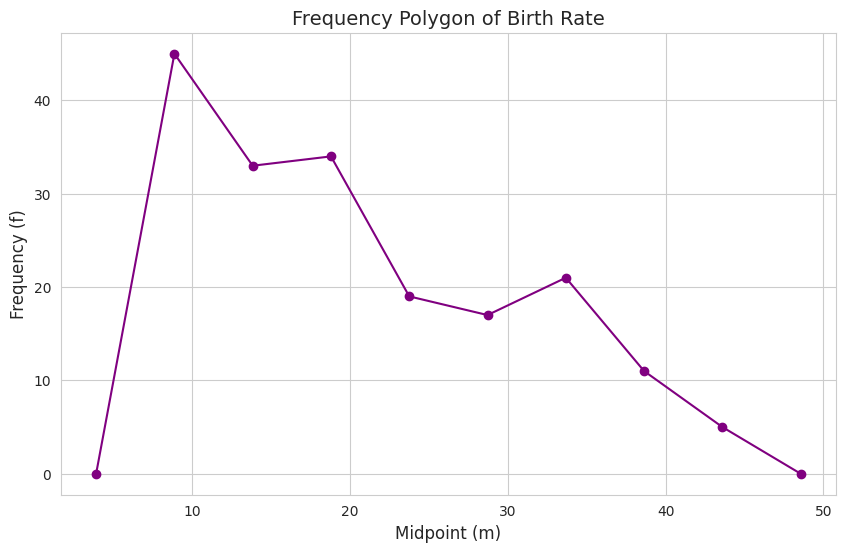


🔹 Grouped Frequency Analysis for: Population

Frequency Table for Population:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,18233.00 - 174730328.88,178,8.737428e+07,0.962162,178
1,174730328.88 - 349442424.75,5,2.620864e+08,0.027027,183
2,349442424.75 - 524154520.62,0,4.367985e+08,0.000000,183
3,524154520.62 - 698866616.50,0,6.115106e+08,0.000000,183
4,698866616.50 - 873578712.38,0,7.862227e+08,0.000000,183
5,873578712.38 - 1048290808.25,0,9.609348e+08,0.000000,183
6,1048290808.25 - 1223002904.12,0,1.135647e+09,0.000000,183
7,1223002904.12 - 1397715000.00,2,1.310359e+09,0.010811,185


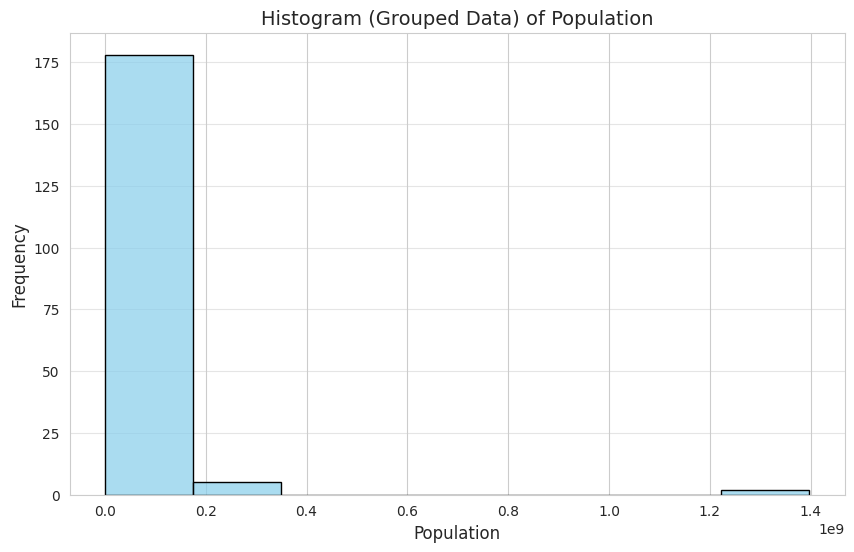

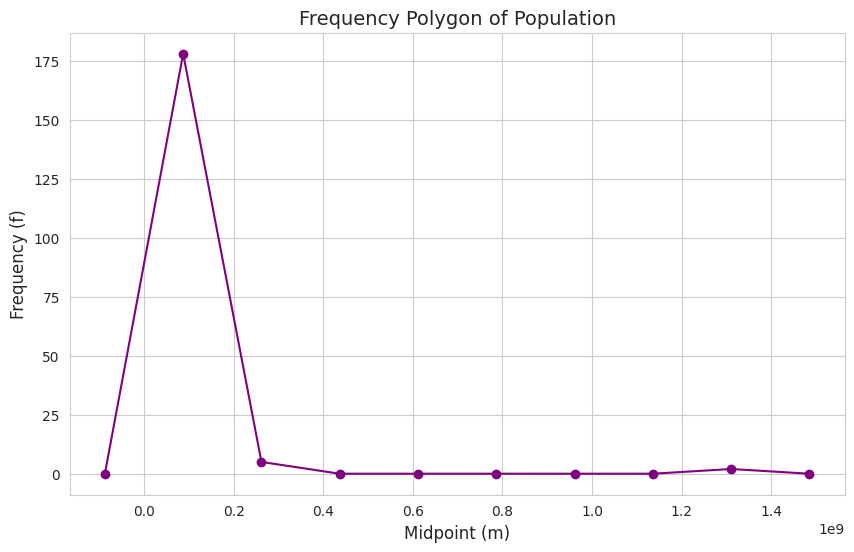


🔹 Grouped Frequency Analysis for: Co2-Emissions

Frequency Table for Co2-Emissions:


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,51.00 - 1236674.38,181,6.183627e+05,0.978378,181
1,1236674.38 - 2473297.75,2,1.854986e+06,0.010811,183
2,2473297.75 - 3709921.12,0,3.091609e+06,0.000000,183
3,3709921.12 - 4946544.50,0,4.328233e+06,0.000000,183
4,4946544.50 - 6183167.88,1,5.564856e+06,0.005405,184
5,6183167.88 - 7419791.25,0,6.801480e+06,0.000000,184
6,7419791.25 - 8656414.62,0,8.038103e+06,0.000000,184
7,8656414.62 - 9893038.00,1,9.274726e+06,0.005405,185


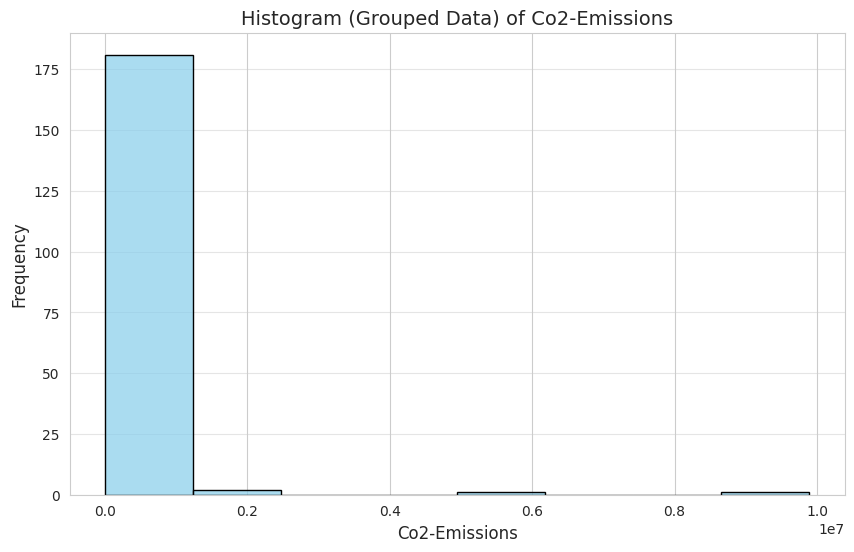

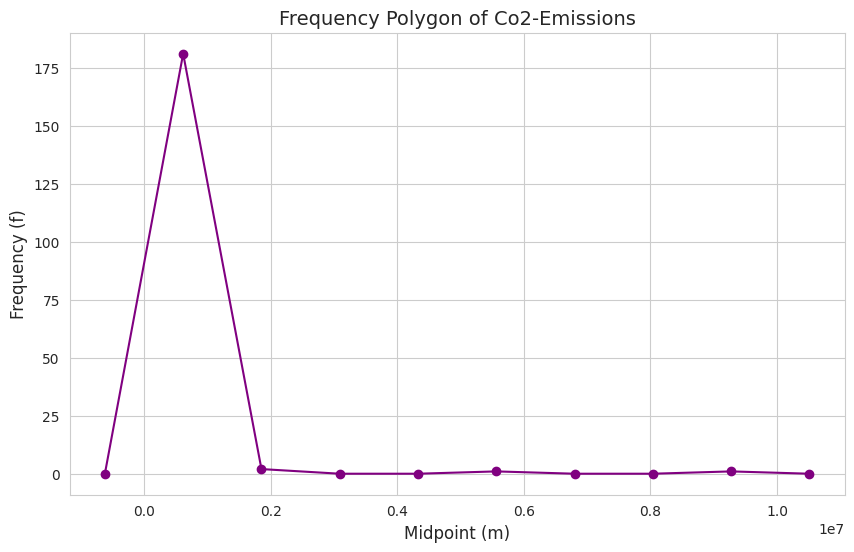


🔹 Grouped Frequency Analysis for: Forested Area (%)

Frequency Table for Forested Area (%):


,Class Interval,Frequency (f),Midpoint (m),Relative Frequency (rf),Cumulative Frequency (cf)
0,0.00 - 12.29,49,6.14375,0.264865,49
1,12.29 - 24.57,30,18.43125,0.162162,79
2,24.57 - 36.86,33,30.71875,0.178378,112
3,36.86 - 49.15,27,43.00625,0.145946,139
4,49.15 - 61.44,21,55.29375,0.113514,160
5,61.44 - 73.72,16,67.58125,0.086486,176
6,73.72 - 86.01,4,79.86875,0.021622,180
7,86.01 - 98.30,5,92.15675,0.027027,185


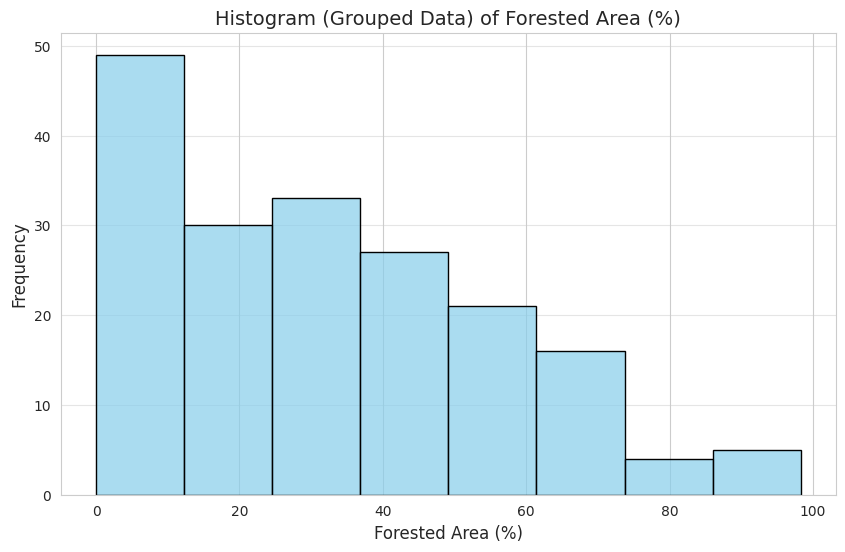

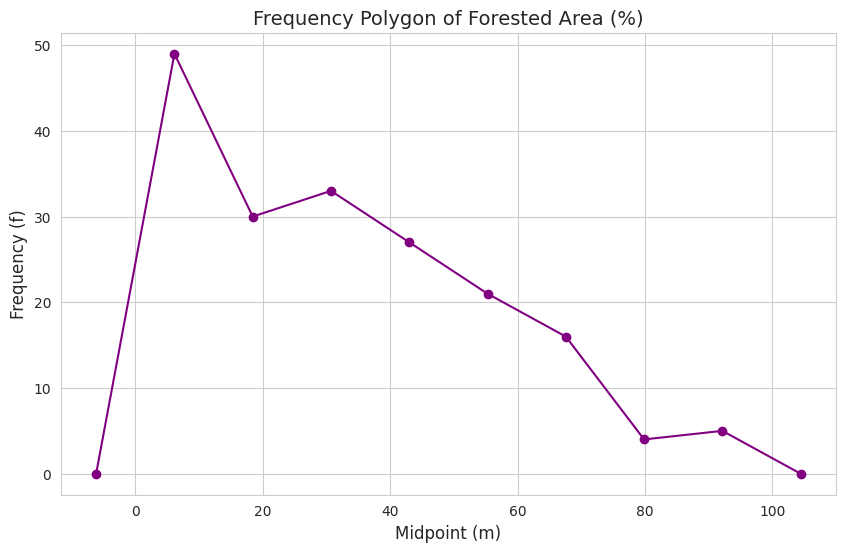

In [ ]:
print("--- 3. GROUPED DATA ANALYSIS FOR ALL VARIABLES ---")

NUM_BINS = 8  # Number of bins for all variables

grouped_tables = {}  # Dictionary to store frequency tables for each variable

for var in SELECTED_VARS:
    print(f"\n🔹 Grouped Frequency Analysis for: {var}")

    # Calculate bins
    min_val = df_clean[var].min()
    max_val = df_clean[var].max()
    range_val = max_val - min_val
    class_width = round(range_val / NUM_BINS, 2)

    bins = np.linspace(min_val, max_val, NUM_BINS + 1)
    bins[-1] += 0.001  # Include maximum value
    bin_labels = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(NUM_BINS)]

    # Create grouped column
    grouped_col_name = f'Grouped_{var.replace(" ", "_")}'
    df_clean[grouped_col_name] = pd.cut(df_clean[var], bins=bins, labels=bin_labels, include_lowest=True, right=False)

    # Frequency table
    frequency_table = df_clean[grouped_col_name].value_counts(dropna=False).sort_index().reset_index()
    frequency_table.columns = ['Class Interval', 'Frequency (f)']
    frequency_table = frequency_table[frequency_table['Class Interval'].notna()]

    # Midpoints, Relative Frequency, Cumulative Frequency
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(NUM_BINS)]
    frequency_table['Midpoint (m)'] = midpoints
    frequency_table['Relative Frequency (rf)'] = frequency_table['Frequency (f)'] / frequency_table['Frequency (f)'].sum()
    frequency_table['Cumulative Frequency (cf)'] = frequency_table['Frequency (f)'].cumsum()

    # Store table in dictionary
    grouped_tables[var] = frequency_table

    # Display frequency table
    print(f"\nFrequency Table for {var}:")
    display(frequency_table)

    # --- Optional: Plot Histogram ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clean[var], bins=bins, kde=False, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram (Grouped Data) of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    # --- Optional: Plot Frequency Polygon ---
    plt.figure(figsize=(10, 6))
    poly_m = [midpoints[0] - class_width] + midpoints + [midpoints[-1] + class_width]
    poly_f = [0] + frequency_table['Frequency (f)'].tolist() + [0]
    plt.plot(poly_m, poly_f, marker='o', linestyle='-', color='purple')
    plt.title(f'Frequency Polygon of {var}')
    plt.xlabel('Midpoint (m)')
    plt.ylabel('Frequency (f)')
    plt.grid(True)
    plt.show()
